In [5]:
from matplotlib import cm
import torch
import gpytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def data_import(path, delimiter):
    # Read the data, treating empty strings as NaN
    if delimiter == 'none':
        data = pd.read_csv(path, na_values=["", " ", "nan", "NaN", "NA"])
    else:
        data = pd.read_csv(path, delimiter=delimiter, na_values=["", " ", "nan", "NaN", "NA"])
    
    # Drop rows with any NaN values
    data.dropna(axis=0, how='any', inplace=True)
    return data



def data_frequency(file1, desired_frequency: str):
    # Ensure 'Time(UTC)' is in datetime format
    file1['Time(UTC)'] = pd.to_datetime(file1['Time(UTC)'])

    # Set 'Time(UTC)' as the index
    file1.set_index('Time(UTC)', inplace=True)

    if desired_frequency == 'ten_minute':
        file1 = file1.resample('10T').mean()
    elif desired_frequency == '4_hourly':
        file1 = file1.resample('4H').mean()
    elif desired_frequency == 'hourly':
        file1 = file1.resample('H').mean()
    elif desired_frequency == 'twelve_hourly':
        file1 = file1.resample('12H').mean()
    elif desired_frequency == 'daily':
        file1 = file1.resample('D').mean()

    # Drop any rows with NaN values after resampling
    # Drop rows with any NaN values
    file1.dropna(axis=0, how='any', inplace=True)    
    # Reset the index and name it 'Time(UTC)'
    file1.reset_index(inplace=True)
    file1.rename(columns={file1.index.name: 'Time(UTC)'}, inplace=True)

    return file1

def time_to_sincos(df):
    sin_values = []
    cos_values = []

    for i in range(len(df)):
        sin_values.append(np.sin((2 * np.pi * i) / 365.25))
        cos_values.append(np.cos((2 * np.pi * i) / 365.25))
        
    df['Time_sin'] = sin_values
    df['Time_cos'] = cos_values
    
    return df


#importing s2 and m1 data sets
# s2_site_data= data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILS2_cleaned.csv", 'none')
# m1_site_data = data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILM1_cleaned.csv", 'none')

m1_site_data = data_import("/Users/elijah_valverde/lanl_GP/lanlGP/data/ARMSAILM1_cleaned.csv", 'none')
s2_site_data = data_import("/Users/elijah_valverde/lanl_GP/lanlGP/data/ARMSAILS2_cleaned.csv", 'none')

#change to 12 hour frequency 
s2_site_data = data_frequency(s2_site_data, '4_hourly')
m1_site_data = data_frequency(m1_site_data, '4_hourly') 

#extract time(UTC) collumns for usage later
time_s2 = s2_site_data['Time(UTC)']
time_m1 = m1_site_data['Time(UTC)']

#remove pressure data from sets
s2_site_data.drop(columns=['sample_pres_mmHg'], inplace=True)
m1_site_data.drop(columns=['sample_pres_mmHg'], inplace=True)


#add sin and cos time values to data
s2_site_data = time_to_sincos(s2_site_data)
m1_site_data = time_to_sincos(m1_site_data)


#change entire dataset to tensor
collumns = ['Time_sin', 'Time_cos', 'sample_rh_pct', 'sample_temp_C', 'pm_1_ug_per_m3']
s2_site_data = torch.tensor(s2_site_data[collumns].values, dtype=torch.float32)
m1_site_data = torch.tensor(m1_site_data[collumns].values, dtype=torch.float32)


/var/folders/pd/352180qj1xq9dx36hs_6k6r40000gn/T/ipykernel_17067/2792274936.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  file1 = file1.resample('4H').mean()
/var/folders/pd/352180qj1xq9dx36hs_6k6r40000gn/T/ipykernel_17067/2792274936.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  file1 = file1.resample('4H').mean()


In [6]:
def count_points_in_month(time_series, month, year):
    # Convert the time series to datetime format
    time_series = pd.to_datetime(time_series)
    
    # Filter the series for the given month and year
    mask = (time_series.dt.month == month) & (time_series.dt.year == year)
    filtered_series = time_series[mask]
    
    # Count the number of data points in the filtered series
    count = filtered_series.shape[0]
    
    return count

# Example usage
# Count the number of data points for each month in s2 data
points_in_june_2022 = count_points_in_month(time_s2, 6, 2022)
print(f'Number of data points in June 2022: {points_in_june_2022}')

points_in_july_2022 = count_points_in_month(time_s2, 7, 2022)
print(f'Number of data points in July 2022: {points_in_july_2022}')

points_in_august_2022 = count_points_in_month(time_s2, 8, 2022)
print(f'Number of data points in August 2022: {points_in_august_2022}')

points_in_september_2022 = count_points_in_month(time_s2, 9, 2022)
print(f'Number of data points in September 2022: {points_in_september_2022}')

points_in_october_2022 = count_points_in_month(time_s2, 10, 2022)
print(f'Number of data points in October 2022: {points_in_october_2022}')

points_in_november_2022 = count_points_in_month(time_s2, 11, 2022)
print(f'Number of data points in November 2022: {points_in_november_2022}')

# Count the number of data points in December 2022
points_in_december_2022 = count_points_in_month(time_s2, 12, 2022)
print(f'Number of data points in December 2022: {points_in_december_2022}')

# Count the number of data points in January 2023
points_in_january_2023 = count_points_in_month(time_s2, 1, 2023)
print(f'Number of data points in January 2023: {points_in_january_2023}')

# Count the number of data points in February 2023
points_in_february_2023 = count_points_in_month(time_s2, 2, 2023)
print(f'Number of data points in February 2023: {points_in_february_2023}')

# Count the number of data points in March 2023
points_in_march_2023 = count_points_in_month(time_s2, 3, 2023)
print(f'Number of data points in March 2023: {points_in_march_2023}')

# Count the number of data points in April 2023
points_in_april_2023 = count_points_in_month(time_s2, 4, 2023)
print(f'Number of data points in April 2023: {points_in_april_2023}')

# Count the number of data points in May 2023
points_in_may_2023 = count_points_in_month(time_s2, 5, 2023)
print(f'Number of data points in May 2023: {points_in_may_2023}')

# Count the number of data points in June 2023
points_in_june_2023 = count_points_in_month(time_s2, 6, 2023)
print(f'Number of data points in June 2023: {points_in_june_2023}')


# Count the number of data points for each month in m1 data
points_in_june_2022_m1 = count_points_in_month(time_m1, 6, 2022)
print(f'Number of data points in June 2022 (m1): {points_in_june_2022_m1}')

points_in_july_2022_m1 = count_points_in_month(time_m1, 7, 2022)
print(f'Number of data points in July 2022 (m1): {points_in_july_2022_m1}')

points_in_august_2022_m1 = count_points_in_month(time_m1, 8, 2022)
print(f'Number of data points in August 2022 (m1): {points_in_august_2022_m1}')

points_in_september_2022_m1 = count_points_in_month(time_m1, 9, 2022)
print(f'Number of data points in September 2022 (m1): {points_in_september_2022_m1}')

points_in_october_2022_m1 = count_points_in_month(time_m1, 10, 2022)
print(f'Number of data points in October 2022 (m1): {points_in_october_2022_m1}')

points_in_november_2022_m1 = count_points_in_month(time_m1, 11, 2022)
print(f'Number of data points in November 2022 (m1): {points_in_november_2022_m1}')

points_in_december_2022_m1 = count_points_in_month(time_m1, 12, 2022)
print(f'Number of data points in December 2022 (m1): {points_in_december_2022_m1}')

points_in_january_2023_m1 = count_points_in_month(time_m1, 1, 2023)
print(f'Number of data points in January 2023 (m1): {points_in_january_2023_m1}')

points_in_february_2023_m1 = count_points_in_month(time_m1, 2, 2023)
print(f'Number of data points in February 2023 (m1): {points_in_february_2023_m1}')

points_in_march_2023_m1 = count_points_in_month(time_m1, 3, 2023)
print(f'Number of data points in March 2023 (m1): {points_in_march_2023_m1}')

points_in_april_2023_m1 = count_points_in_month(time_m1, 4, 2023)
print(f'Number of data points in April 2023 (m1): {points_in_april_2023_m1}')

points_in_may_2023_m1 = count_points_in_month(time_m1, 5, 2023)
print(f'Number of data points in May 2023 (m1): {points_in_may_2023_m1}')

points_in_june_2023_m1 = count_points_in_month(time_m1, 6, 2023)
print(f'Number of data points in June 2023 (m1): {points_in_june_2023_m1}')

#split time_{m1, s2} months and define variables based on that
time_s2 = pd.to_datetime(time_s2)
time_m1 = pd.to_datetime(time_m1)

time_s2_june_2022 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2022)]
time_s2_july_2022 = time_s2[(time_s2.dt.month == 7) & (time_s2.dt.year == 2022)]
time_s2_august_2022 = time_s2[(time_s2.dt.month == 8) & (time_s2.dt.year == 2022)]
time_s2_september_2022 = time_s2[(time_s2.dt.month == 9) & (time_s2.dt.year == 2022)]
time_s2_october_2022 = time_s2[(time_s2.dt.month == 10) & (time_s2.dt.year == 2022)]
time_s2_november_2022 = time_s2[(time_s2.dt.month == 11) & (time_s2.dt.year == 2022)]
time_s2_december_2022 = time_s2[(time_s2.dt.month == 12) & (time_s2.dt.year == 2022)]
time_s2_january_2023 = time_s2[(time_s2.dt.month == 1) & (time_s2.dt.year == 2023)]
time_s2_february_2023 = time_s2[(time_s2.dt.month == 2) & (time_s2.dt.year == 2023)]
time_s2_march_2023 = time_s2[(time_s2.dt.month == 3) & (time_s2.dt.year == 2023)]
time_s2_april_2023 = time_s2[(time_s2.dt.month == 4) & (time_s2.dt.year == 2023)]
time_s2_may_2023 = time_s2[(time_s2.dt.month == 5) & (time_s2.dt.year == 2023)]
time_s2_june_2023 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2023)]

time_m1_june_2022 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2022)]
time_m1_july_2022 = time_m1[(time_m1.dt.month == 7) & (time_m1.dt.year == 2022)]
time_m1_august_2022 = time_m1[(time_m1.dt.month == 8) & (time_m1.dt.year == 2022)]
time_m1_september_2022 = time_m1[(time_m1.dt.month == 9) & (time_m1.dt.year == 2022)]
time_m1_october_2022 = time_m1[(time_m1.dt.month == 10) & (time_m1.dt.year == 2022)]
time_m1_november_2022 = time_m1[(time_m1.dt.month == 11) & (time_m1.dt.year == 2022)]
time_m1_december_2022 = time_m1[(time_m1.dt.month == 12) & (time_m1.dt.year == 2022)]
time_m1_january_2023 = time_m1[(time_m1.dt.month == 1) & (time_m1.dt.year == 2023)]
time_m1_february_2023 = time_m1[(time_m1.dt.month == 2) & (time_m1.dt.year == 2023)]
time_m1_march_2023 = time_m1[(time_m1.dt.month == 3) & (time_m1.dt.year == 2023)]
time_m1_april_2023 = time_m1[(time_m1.dt.month == 4) & (time_m1.dt.year == 2023)]
time_m1_may_2023 = time_m1[(time_m1.dt.month == 5) & (time_m1.dt.year == 2023)]
time_m1_june_2023 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2023)]


Number of data points in June 2022: 61
Number of data points in July 2022: 177
Number of data points in August 2022: 186
Number of data points in September 2022: 180
Number of data points in October 2022: 133
Number of data points in November 2022: 134
Number of data points in December 2022: 171
Number of data points in January 2023: 117
Number of data points in February 2023: 153
Number of data points in March 2023: 180
Number of data points in April 2023: 178
Number of data points in May 2023: 186
Number of data points in June 2023: 102
Number of data points in June 2022 (m1): 19
Number of data points in July 2022 (m1): 180
Number of data points in August 2022 (m1): 186
Number of data points in September 2022 (m1): 180
Number of data points in October 2022 (m1): 184
Number of data points in November 2022 (m1): 156
Number of data points in December 2022 (m1): 162
Number of data points in January 2023 (m1): 166
Number of data points in February 2023 (m1): 79
Number of data points in Ma

In [7]:
def create_monthly_subsets(data_tensor, num_points_dict, prefix):
    start_idx = 0
    subsets = {}

    for year_month, num_points in num_points_dict.items():
        # Calculate the end index
        end_idx = start_idx + num_points
        
        # Create a name for the subset
        subset_name = f"{prefix}_{year_month.replace('-', '_')}"
        
        # Slice the data tensor to get the subset
        subsets[subset_name] = data_tensor[start_idx:end_idx]
        
        # Update the start index
        start_idx = end_idx
    
    return subsets

# Provided values for the number of data points per month
num_points_s2 = {
    "2022-06": points_in_june_2022,
    "2022-07": points_in_july_2022,
    "2022-08": points_in_august_2022,
    "2022-09": points_in_september_2022,
    "2022-10": points_in_october_2022,
    "2022-11": points_in_november_2022,
    "2022-12": points_in_december_2022,
    "2023-01": points_in_january_2023,
    "2023-02": points_in_february_2023,
    "2023-03": points_in_march_2023,
    "2023-04": points_in_april_2023,
    "2023-05": points_in_may_2023,
    "2023-06": points_in_june_2023
}

num_points_m1 = {
    "2022-06": points_in_june_2022_m1,
    "2022-07": points_in_july_2022_m1,
    "2022-08": points_in_august_2022_m1,
    "2022-09": points_in_september_2022_m1,
    "2022-10": points_in_october_2022_m1,
    "2022-11": points_in_november_2022_m1,
    "2022-12": points_in_december_2022_m1,
    "2023-01": points_in_january_2023_m1,
    "2023-02": points_in_february_2023_m1,
    "2023-03": points_in_march_2023_m1,
    "2023-04": points_in_april_2023_m1,
    "2023-05": points_in_may_2023_m1,
    "2023-06": points_in_june_2023_m1
}
    
""" num_points_s2 = {
    "2022-06": 14328,
    "2022-07": 42180,
    "2022-08": 44630,
    "2022-09": 43200,
    "2022-10": 31768,
    "2022-11": 30998,
    "2022-12": 40247,
    "2023-01": 26928,
    "2023-02": 34744,
    "2023-03": 41444,
    "2023-04": 42244,
    "2023-05": 44633,
    "2023-06": 24254
}

num_points_m1 = {
    "2022-06": 4247,
    "2022-07": 42579,
    "2022-08": 44637,
    "2022-09": 43198,
    "2022-10": 43510,
    "2022-11": 34796,
    "2022-12": 37315,
    "2023-01": 38396,
    "2023-02": 16462,
    "2023-03": 24437,
    "2023-04": 15325,
    "2023-05": 9290,
    "2023-06": 1092
} """

# Assuming s2_site_data and m1_site_data are already loaded as tensors
monthly_data_s2 = create_monthly_subsets(s2_site_data, num_points_s2, "s2")
monthly_data_m1 = create_monthly_subsets(m1_site_data, num_points_m1, "m1")


#intialize monthly values for s2 and m1 datasets
s2_june22 = monthly_data_s2['s2_2022_06']
s2_july22 = monthly_data_s2['s2_2022_07']
s2_aug22 = monthly_data_s2['s2_2022_08']
s2_sept22 = monthly_data_s2['s2_2022_09']
s2_oct22 = monthly_data_s2['s2_2022_10']
s2_nov22 = monthly_data_s2['s2_2022_11']
s2_dec22 = monthly_data_s2['s2_2022_12']
s2_jan23 = monthly_data_s2['s2_2023_01']
s2_feb23 = monthly_data_s2['s2_2023_02']
s2_mar23 = monthly_data_s2['s2_2023_03']
s2_apr23 = monthly_data_s2['s2_2023_04']
s2_may23 = monthly_data_s2['s2_2023_05']
s2_june23 = monthly_data_s2['s2_2023_06']

m1_june22 = monthly_data_m1['m1_2022_06']
m1_july22 = monthly_data_m1['m1_2022_07']
m1_aug22 = monthly_data_m1['m1_2022_08']
m1_sept22 = monthly_data_m1['m1_2022_09']
m1_oct22 = monthly_data_m1['m1_2022_10']
m1_nov22 = monthly_data_m1['m1_2022_11']
m1_dec22 = monthly_data_m1['m1_2022_12']
m1_jan23 = monthly_data_m1['m1_2023_01']
m1_feb23 = monthly_data_m1['m1_2023_02']
m1_mar23 = monthly_data_m1['m1_2023_03']
m1_apr23 = monthly_data_m1['m1_2023_04']
m1_may23 = monthly_data_m1['m1_2023_05']
m1_june23 = monthly_data_m1['m1_2023_06']


""" #for loop to print shapes of each month
for month in monthly_data_s2:
    print(f"{month}: {monthly_data_s2[month].shape}")

for month in monthly_data_m1:
    print(f"{month}: {monthly_data_m1[month].shape}")
 """

def extract_time_series_by_month(time_series, num_points_dict, prefix):
    start_idx = 0
    time_series_dict = {}

    for year_month, num_points in num_points_dict.items():
        end_idx = start_idx + num_points
        subset_name = f"{prefix}_time_series_{year_month.replace('-', '_')}"
        time_series_dict[subset_name] = time_series[start_idx:end_idx]
        start_idx = end_idx
    
    return time_series_dict

# Extract time series for each month for s2 data
time_series_s2_dict = extract_time_series_by_month(time_s2, num_points_s2, 's2')

# Extract time series for each month for m1 data
time_series_m1_dict = extract_time_series_by_month(time_m1, num_points_m1, 'm1')

 # Print the shapes to verify
for month, series in time_series_s2_dict.items():
    print(f"{month}: {series.shape}")

""" for month, series in time_series_m1_dict.items():
    print(f"{month}: {series.shape}")  """


# Print the keys and shapes to verify


s2_time_series_2022_06: (61,)
s2_time_series_2022_07: (177,)
s2_time_series_2022_08: (186,)
s2_time_series_2022_09: (180,)
s2_time_series_2022_10: (133,)
s2_time_series_2022_11: (134,)
s2_time_series_2022_12: (171,)
s2_time_series_2023_01: (117,)
s2_time_series_2023_02: (153,)
s2_time_series_2023_03: (180,)
s2_time_series_2023_04: (178,)
s2_time_series_2023_05: (186,)
s2_time_series_2023_06: (102,)


' for month, series in time_series_m1_dict.items():\n    print(f"{month}: {series.shape}")  '

In [8]:
def evenly_disperse_split(data_tensor, n, reverse=0):
    training_size = int(n * data_tensor.shape[0])
    total_points = data_tensor.shape[0]
    indices = np.arange(total_points)
    # Calculate step size to achieve the desired training size
    step_size = max(1, total_points // training_size)
    # Select training indices evenly distributed throughout the dataset
    train_indices = indices[::step_size][:training_size]
    test_indices = np.setdiff1d(indices, train_indices)
 
    if reverse == 0:
        train_indices, test_indices = test_indices, train_indices
    
    # Split the data into training and testing sets using the indices
    train_x = data_tensor[train_indices, :-1]
    test_x = data_tensor[test_indices, :-1]
    train_y = data_tensor[train_indices, -1]
    test_y = data_tensor[test_indices, -1]



    """     print(f'step size is ', {step_size})

    print(f'train indices is ', (train_indices))

    print(f'test indices is ', (test_indices)) """
    
    return train_x, test_x, train_y, test_y

""" evenly_disperse_split(s2_apr23, 0.0, 0)
 """

' evenly_disperse_split(s2_apr23, 0.0, 0)\n '

In [12]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.PeriodicKernel(
                period_length_prior=gpytorch.priors.NormalPrior(24, 1.0)
            ) * gpytorch.kernels.MaternKernel(
                nu=2.5, lengthscale_prior=gpytorch.priors.NormalPrior(1.0, 0.1)
            )
        ) 
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

def optimize(train_x, train_y):

    # Initialize the likelihood with an appropriate noise constraint
    noise_constraint = gpytorch.constraints.GreaterThan(1e-6)
    likelihood = gpytorch.likelihoods.GaussianLikelihood(noise_constraint=noise_constraint)

    model = ExactGPModel(train_x, train_y, likelihood)
    training_iter = 300
    model.train()
    likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)


    for i in range(training_iter):
        optimizer.zero_grad()
        output = model(train_x)  # This line causes the error
        loss = -mll(output, train_y).mean()
        loss.backward()
        optimizer.step()

        # Clear caches by toggling training mode
        model.train()
        if i % 10 == 0:
            print(f'Iter {i+1:d}/{training_iter:d} - Loss: {loss.item():.3f} ')
    return model, likelihood

def eval_gaussian(model, likelihood, test_x, test_y):
    model.eval()
    likelihood.eval()
    observed_pred = likelihood(model(test_x))
    mean = observed_pred.mean
    lower, upper = observed_pred.confidence_region()
    variance = observed_pred.variance
    mse = torch.mean(torch.pow(mean - test_y, 2))
    nll = -observed_pred.log_prob(test_y).mean()
    mape = torch.mean(torch.abs((test_y - mean) / test_y)) * 100


    return mse, observed_pred, nll, mape, mean, lower, upper, variance

def plot_gp_with_dates(time_series, true_y, predicted_y, lower, upper, title, mse, nll, mape):
    # Print the metrics
    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Negative Log Likelihood: {nll:.3f}')
    print(f'Mean Absolute Percentage Error: {mape:.3f}%')

    # Convert time_series to datetime if not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(time_series):
        time_series = pd.to_datetime(time_series)

    # Ensure all inputs are numpy arrays
    if torch.is_tensor(true_y):
        true_y = true_y.detach().numpy()
    if torch.is_tensor(predicted_y):
        predicted_y = predicted_y.detach().numpy()
    if torch.is_tensor(lower):
        lower = lower.detach().numpy()
    if torch.is_tensor(upper):
        upper = upper.detach().numpy()

    # Plot the data
    plt.figure(figsize=(14, 10))

    plt.plot(time_series, true_y, 'k*', label='True Values')
    plt.plot(time_series, predicted_y, '*', label='Predicted Values')

    # Add vertical bars for confidence intervals
    plt.vlines(time_series, lower, upper, color='blue', alpha=0.5, label='95% Confidence Interval')

    # Add vertical bars for errors
    plt.vlines(time_series, true_y, predicted_y, color='r', linestyle='dashed', alpha=0.7, label='Prediction Error')

    plt.xlabel('Date')
    plt.ylabel('PM 1 ug/m3')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()

   

In [13]:
def run_plt_gp(dataset, time_series,title,  reverse):    
    train_x, test_x, train_y, test_y = evenly_disperse_split(dataset, 0.5, reverse=reverse)
    
    """   print(f'Training set size: {train_x.shape}')
    print(f'Test set size: {test_x.shape}')
    print(f'Training target size: {train_y.shape}')
    print(f'Test target size: {test_y.shape}') """
    
    # Optimization step
    model, likelihood = optimize(train_x, train_y)

    # Ensure model is in eval mode
    model.eval()
    likelihood.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        observed_pred = likelihood(model(test_x))

    # Evaluate the model
    mse, observed_pred, nll, mape, mean, lower, upper, variance = eval_gaussian(model, likelihood, test_x, test_y)

    # Extract true values from the test set
    true_y = test_y.detach().numpy()

    # Extract the corresponding dates from the original time series
    time_series = pd.to_datetime(time_series[-len(dataset):][-len(test_x):])
    
    # Extract the corresponding dates for the training data
    train_time_series = pd.to_datetime(time_series[-len(dataset):][:len(train_x)])

    # Convert tensors to numpy arrays for plotting
    mean_np = mean.detach().numpy()
    lower_np = lower.detach().numpy()
    upper_np = upper.detach().numpy()


    plot_gp_with_dates(time_series, true_y, mean_np, lower_np, upper_np, title, mse, nll, mape)


GP on s2 time series 2022 06 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 10.234 
Iter 11/300 - Loss: 9.691 
Iter 21/300 - Loss: 9.264 
Iter 31/300 - Loss: 8.809 
Iter 41/300 - Loss: 8.378 
Iter 51/300 - Loss: 7.977 
Iter 61/300 - Loss: 7.605 
Iter 71/300 - Loss: 7.252 
Iter 81/300 - Loss: 6.914 
Iter 91/300 - Loss: 6.591 
Iter 101/300 - Loss: 6.282 
Iter 111/300 - Loss: 5.986 
Iter 121/300 - Loss: 5.704 
Iter 131/300 - Loss: 5.435 
Iter 141/300 - Loss: 5.178 
Iter 151/300 - Loss: 4.932 
Iter 161/300 - Loss: 4.698 
Iter 171/300 - Loss: 4.475 
Iter 181/300 - Loss: 4.262 
Iter 191/300 - Loss: 4.058 
Iter 201/300 - Loss: 3.864 
Iter 211/300 - Loss: 3.679 
Iter 221/300 - Loss: 3.503 
Iter 231/300 - Loss: 3.336 
Iter 241/300 - Loss: 3.176 
Iter 251/300 - Loss: 3.024 
Iter 261/300 - Loss: 2.879 
Iter 271/300 - Loss: 2.742 
Iter 281/300 - Loss: 2.611 
Iter 291/300 - Loss: 2.488 
Mean Squared Error: 0.120
Negative Log Likelihood: 10.761
Mean Absolute Percentage Error:

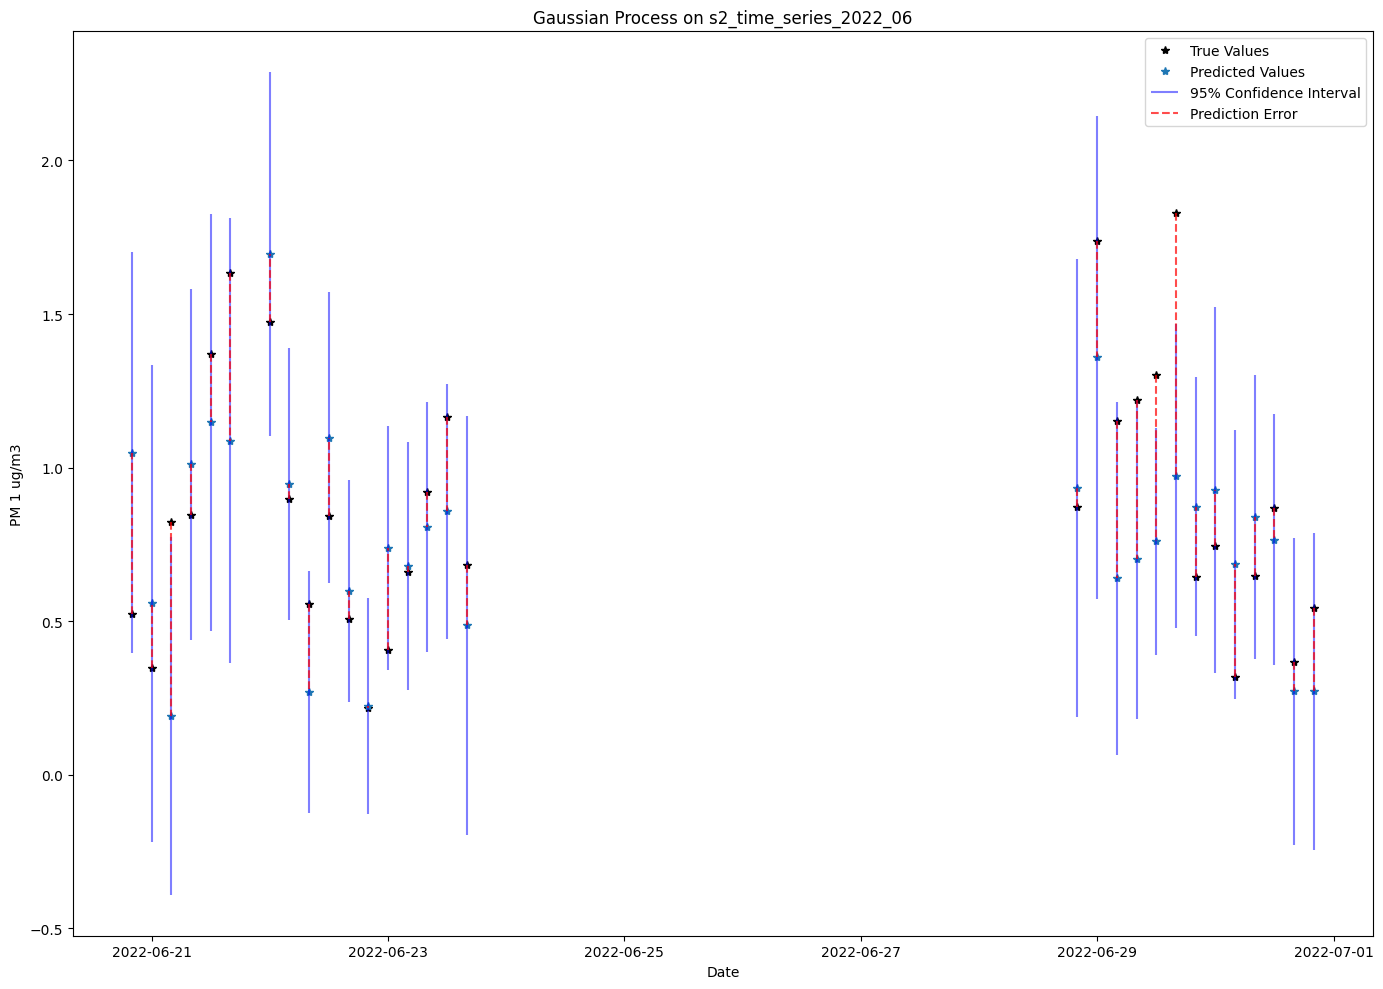

Iter 1/300 - Loss: 10.562 
Iter 11/300 - Loss: 10.013 
Iter 21/300 - Loss: 9.563 
Iter 31/300 - Loss: 9.055 
Iter 41/300 - Loss: 8.598 
Iter 51/300 - Loss: 8.204 
Iter 61/300 - Loss: 7.848 
Iter 71/300 - Loss: 7.502 
Iter 81/300 - Loss: 7.160 
Iter 91/300 - Loss: 6.829 
Iter 101/300 - Loss: 6.511 
Iter 111/300 - Loss: 6.207 
Iter 121/300 - Loss: 5.916 
Iter 131/300 - Loss: 5.639 
Iter 141/300 - Loss: 5.374 
Iter 151/300 - Loss: 5.121 
Iter 161/300 - Loss: 4.880 
Iter 171/300 - Loss: 4.649 
Iter 181/300 - Loss: 4.430 
Iter 191/300 - Loss: 4.220 
Iter 201/300 - Loss: 4.020 
Iter 211/300 - Loss: 3.829 
Iter 221/300 - Loss: 3.648 
Iter 231/300 - Loss: 3.474 
Iter 241/300 - Loss: 3.309 
Iter 251/300 - Loss: 3.152 
Iter 261/300 - Loss: 3.003 
Iter 271/300 - Loss: 2.861 
Iter 281/300 - Loss: 2.726 
Iter 291/300 - Loss: 2.598 
Mean Squared Error: 0.139
Negative Log Likelihood: 11.639
Mean Absolute Percentage Error: 55.617%


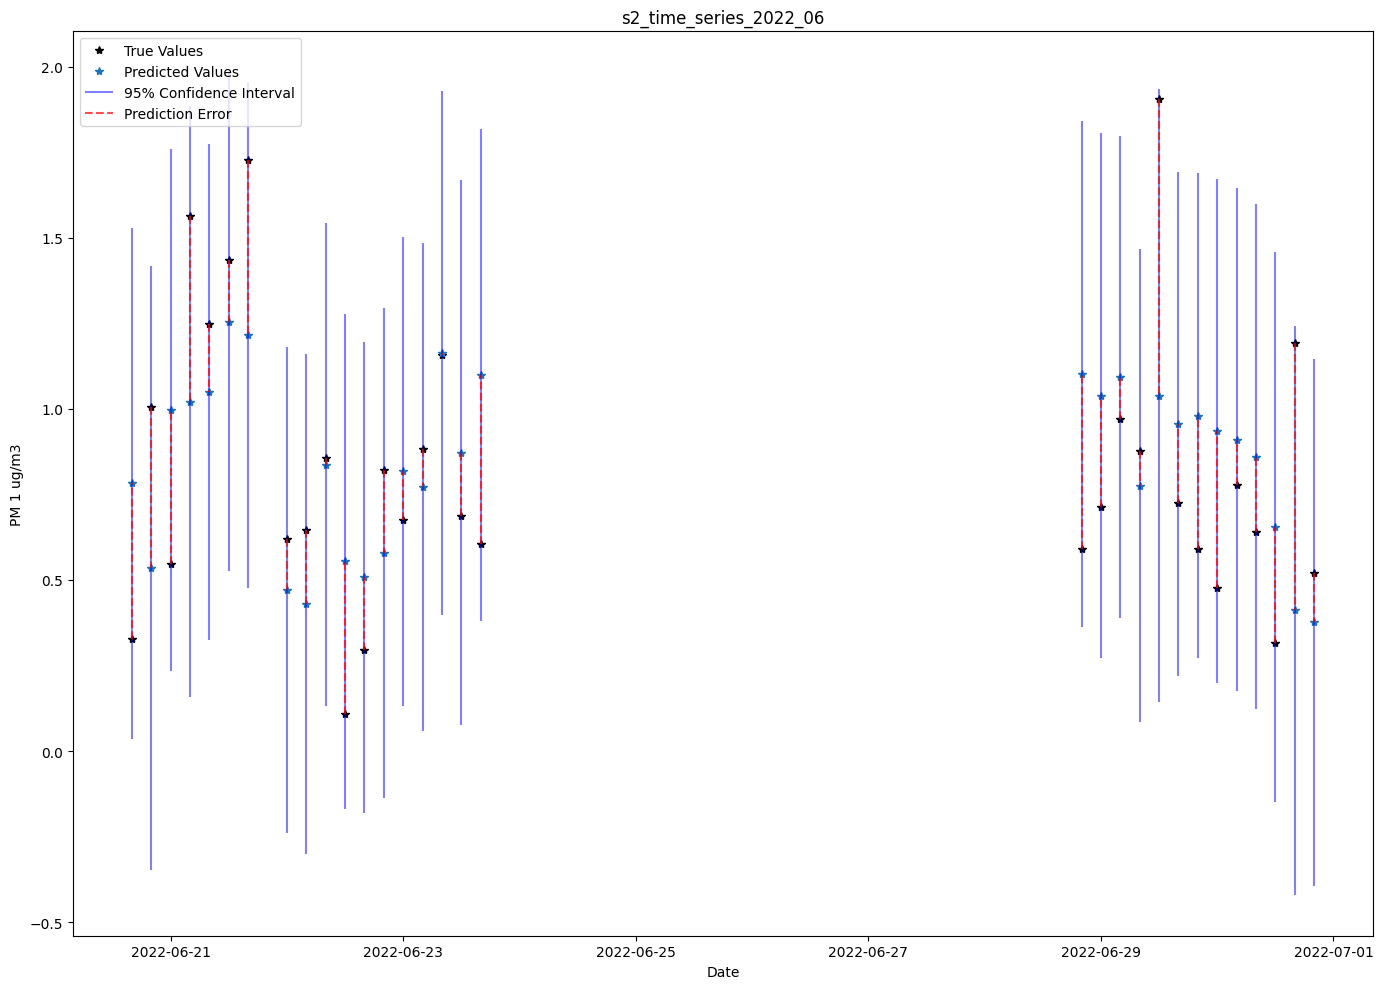

 
GP on s2 time series 2022 07 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 4.545 
Iter 11/300 - Loss: 4.220 
Iter 21/300 - Loss: 3.984 
Iter 31/300 - Loss: 3.838 
Iter 41/300 - Loss: 3.713 
Iter 51/300 - Loss: 3.581 
Iter 61/300 - Loss: 3.457 
Iter 71/300 - Loss: 3.339 
Iter 81/300 - Loss: 3.227 
Iter 91/300 - Loss: 3.119 
Iter 101/300 - Loss: 3.016 
Iter 111/300 - Loss: 2.917 
Iter 121/300 - Loss: 2.823 
Iter 131/300 - Loss: 2.732 
Iter 141/300 - Loss: 2.644 
Iter 151/300 - Loss: 2.560 
Iter 161/300 - Loss: 2.480 
Iter 171/300 - Loss: 2.403 
Iter 181/300 - Loss: 2.329 
Iter 191/300 - Loss: 2.259 
Iter 201/300 - Loss: 2.191 
Iter 211/300 - Loss: 2.126 
Iter 221/300 - Loss: 2.065 
Iter 231/300 - Loss: 2.005 
Iter 241/300 - Loss: 1.949 
Iter 251/300 - Loss: 1.895 
Iter 261/300 - Loss: 1.844 
Iter 271/300 - Loss: 1.794 
Iter 281/300 - Loss: 1.748 
Iter 291/300 - Loss: 1.703 
Mean Squared Error: 0.336
Negative Log Likelihood: 79.105
Mean Absolute Percentage Error

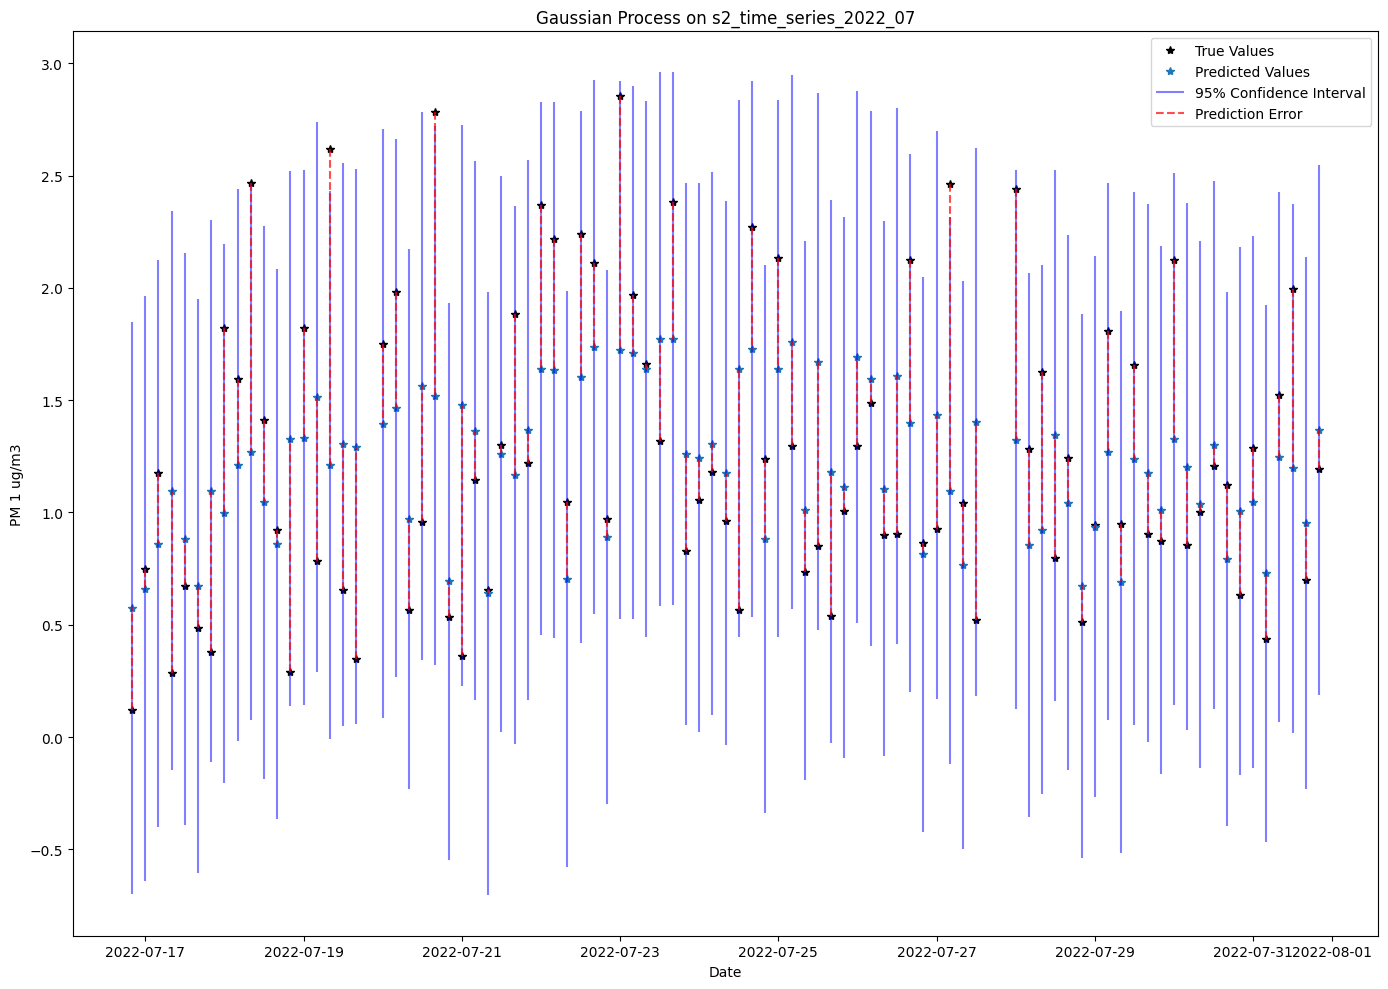

Iter 1/300 - Loss: 4.581 
Iter 11/300 - Loss: 4.259 
Iter 21/300 - Loss: 4.035 
Iter 31/300 - Loss: 3.886 
Iter 41/300 - Loss: 3.755 
Iter 51/300 - Loss: 3.632 
Iter 61/300 - Loss: 3.514 
Iter 71/300 - Loss: 3.399 
Iter 81/300 - Loss: 3.288 
Iter 91/300 - Loss: 3.180 
Iter 101/300 - Loss: 3.077 
Iter 111/300 - Loss: 2.977 
Iter 121/300 - Loss: 2.882 
Iter 131/300 - Loss: 2.790 
Iter 141/300 - Loss: 2.702 
Iter 151/300 - Loss: 2.617 
Iter 161/300 - Loss: 2.536 
Iter 171/300 - Loss: 2.458 
Iter 181/300 - Loss: 2.383 
Iter 191/300 - Loss: 2.312 
Iter 201/300 - Loss: 2.243 
Iter 211/300 - Loss: 2.178 
Iter 221/300 - Loss: 2.115 
Iter 231/300 - Loss: 2.055 
Iter 241/300 - Loss: 1.997 
Iter 251/300 - Loss: 1.942 
Iter 261/300 - Loss: 1.890 
Iter 271/300 - Loss: 1.840 
Iter 281/300 - Loss: 1.792 
Iter 291/300 - Loss: 1.747 
Mean Squared Error: 0.333
Negative Log Likelihood: 78.716
Mean Absolute Percentage Error: 54.148%


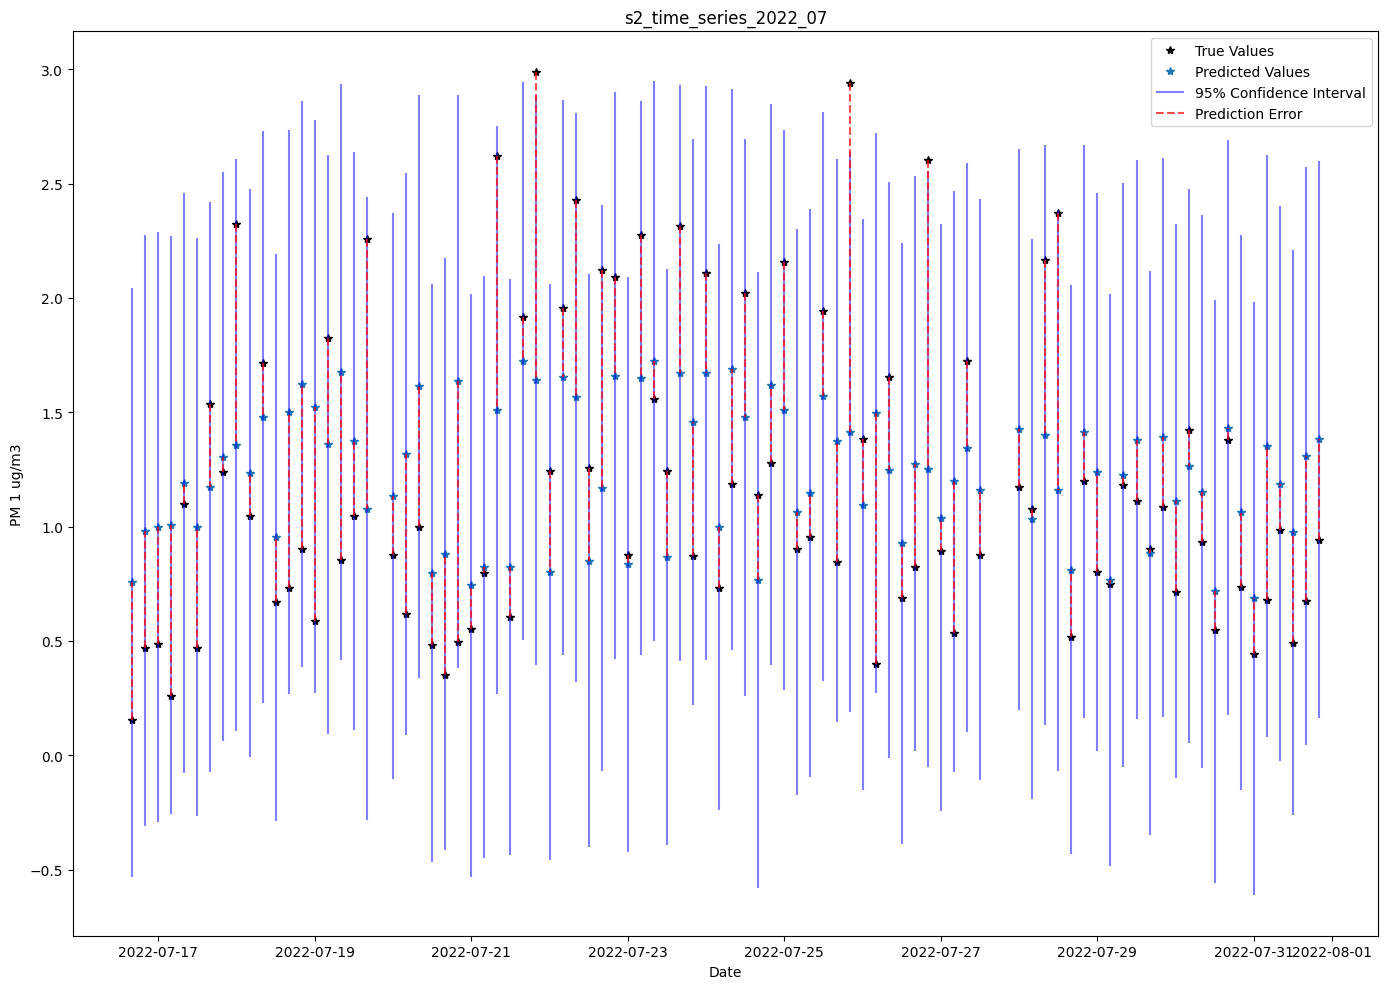

 
GP on s2 time series 2022 08 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 4.278 
Iter 11/300 - Loss: 3.927 
Iter 21/300 - Loss: 3.609 
Iter 31/300 - Loss: 3.331 
Iter 41/300 - Loss: 3.136 
Iter 51/300 - Loss: 3.003 
Iter 61/300 - Loss: 2.883 
Iter 71/300 - Loss: 2.767 
Iter 81/300 - Loss: 2.662 
Iter 91/300 - Loss: 2.562 
Iter 101/300 - Loss: 2.466 
Iter 111/300 - Loss: 2.375 
Iter 121/300 - Loss: 2.288 
Iter 131/300 - Loss: 2.205 
Iter 141/300 - Loss: 2.124 
Iter 151/300 - Loss: 2.047 
Iter 161/300 - Loss: 1.973 
Iter 171/300 - Loss: 1.901 
Iter 181/300 - Loss: 1.832 
Iter 191/300 - Loss: 1.766 
Iter 201/300 - Loss: 1.702 
Iter 211/300 - Loss: 1.641 
Iter 221/300 - Loss: 1.583 
Iter 231/300 - Loss: 1.526 
Iter 241/300 - Loss: 1.472 
Iter 251/300 - Loss: 1.420 
Iter 261/300 - Loss: 1.371 
Iter 271/300 - Loss: 1.323 
Iter 281/300 - Loss: 1.278 
Iter 291/300 - Loss: 1.234 
Mean Squared Error: 0.231
Negative Log Likelihood: 72.413
Mean Absolute Percentage Error

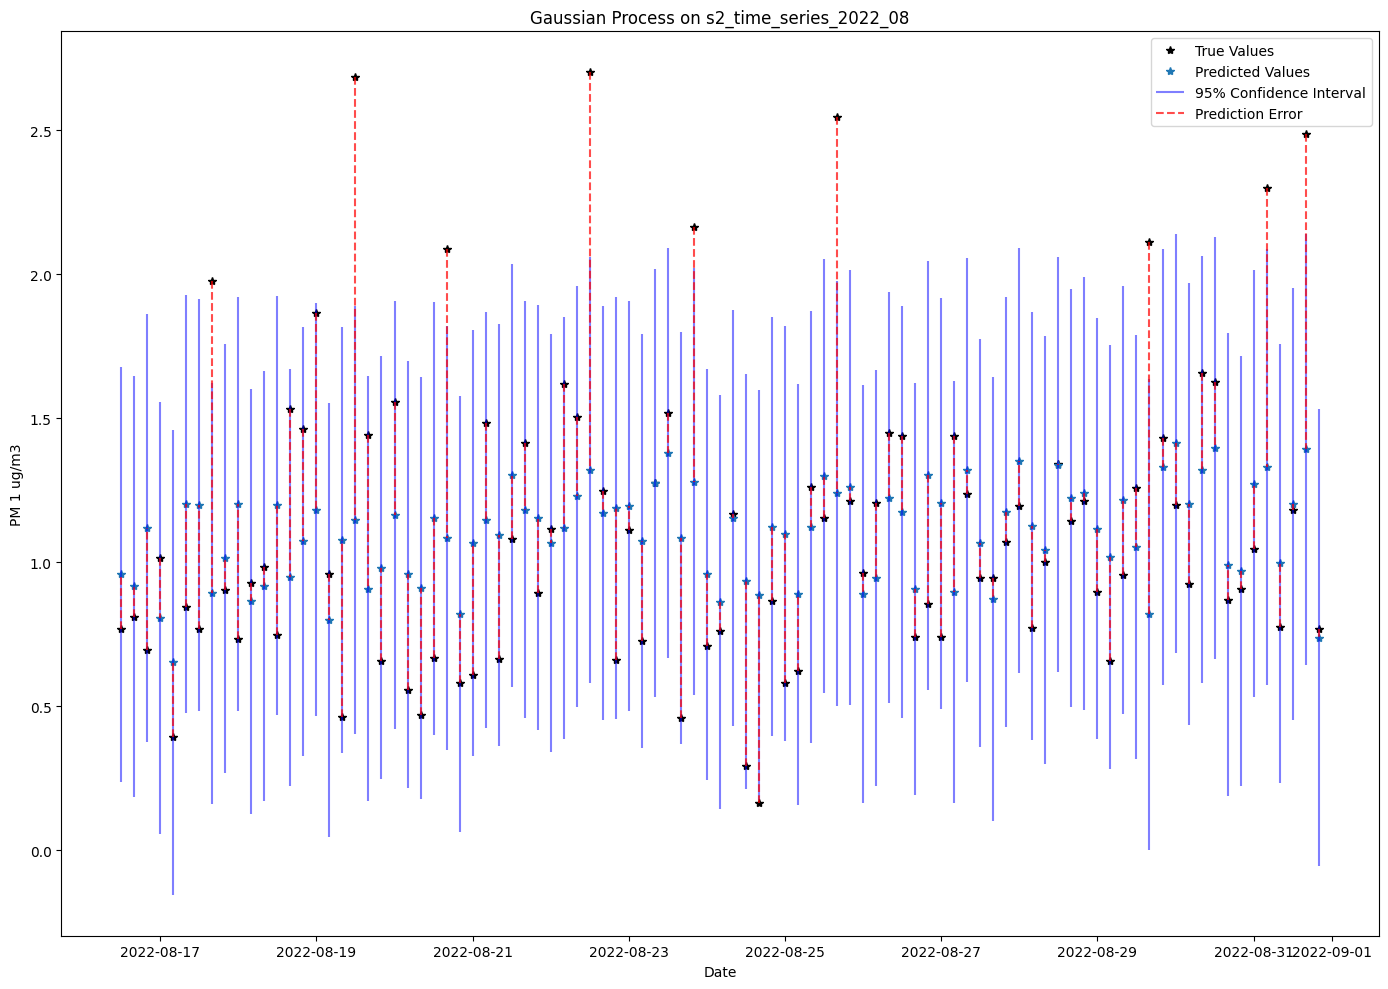

Iter 1/300 - Loss: 4.344 
Iter 11/300 - Loss: 4.022 
Iter 21/300 - Loss: 3.746 
Iter 31/300 - Loss: 3.532 
Iter 41/300 - Loss: 3.395 
Iter 51/300 - Loss: 3.269 
Iter 61/300 - Loss: 3.150 
Iter 71/300 - Loss: 3.040 
Iter 81/300 - Loss: 2.934 
Iter 91/300 - Loss: 2.834 
Iter 101/300 - Loss: 2.737 
Iter 111/300 - Loss: 2.645 
Iter 121/300 - Loss: 2.557 
Iter 131/300 - Loss: 2.472 
Iter 141/300 - Loss: 2.390 
Iter 151/300 - Loss: 2.312 
Iter 161/300 - Loss: 2.237 
Iter 171/300 - Loss: 2.164 
Iter 181/300 - Loss: 2.095 
Iter 191/300 - Loss: 2.028 
Iter 201/300 - Loss: 1.964 
Iter 211/300 - Loss: 1.902 
Iter 221/300 - Loss: 1.843 
Iter 231/300 - Loss: 1.787 
Iter 241/300 - Loss: 1.733 
Iter 251/300 - Loss: 1.681 
Iter 261/300 - Loss: 1.631 
Iter 271/300 - Loss: 1.584 
Iter 281/300 - Loss: 1.538 
Iter 291/300 - Loss: 1.495 
Mean Squared Error: 0.129
Negative Log Likelihood: 43.279
Mean Absolute Percentage Error: 28.574%


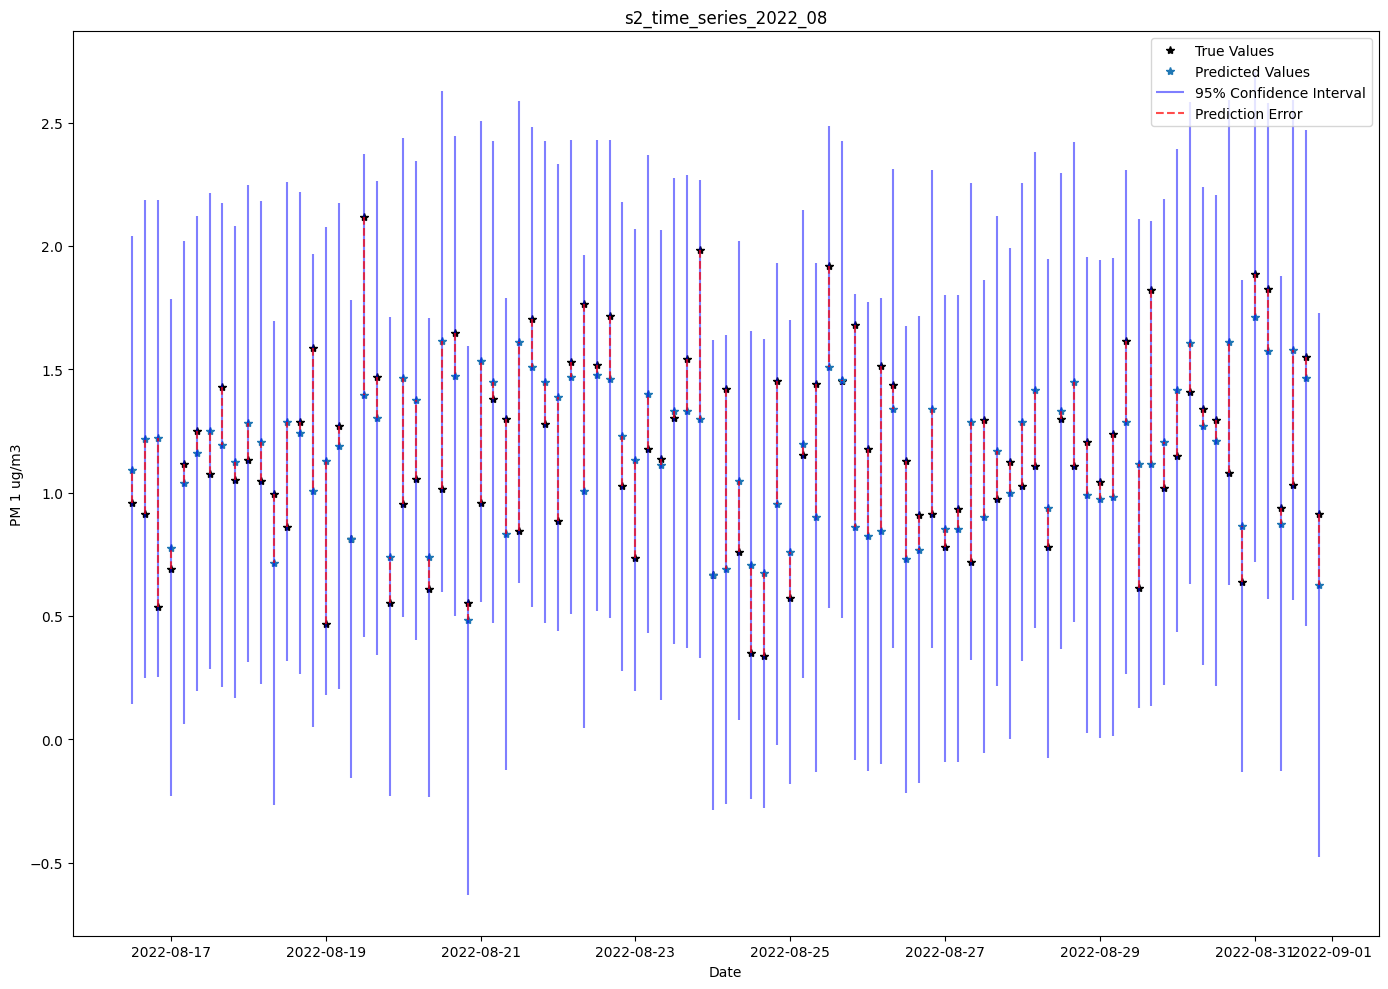

 
GP on s2 time series 2022 09 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 4.692 
Iter 11/300 - Loss: 4.317 
Iter 21/300 - Loss: 4.060 
Iter 31/300 - Loss: 3.888 
Iter 41/300 - Loss: 3.757 
Iter 51/300 - Loss: 3.634 
Iter 61/300 - Loss: 3.519 
Iter 71/300 - Loss: 3.407 
Iter 81/300 - Loss: 3.297 
Iter 91/300 - Loss: 3.192 
Iter 101/300 - Loss: 3.090 
Iter 111/300 - Loss: 2.992 
Iter 121/300 - Loss: 2.898 
Iter 131/300 - Loss: 2.807 
Iter 141/300 - Loss: 2.721 
Iter 151/300 - Loss: 2.638 
Iter 161/300 - Loss: 2.558 
Iter 171/300 - Loss: 2.482 
Iter 181/300 - Loss: 2.409 
Iter 191/300 - Loss: 2.340 
Iter 201/300 - Loss: 2.273 
Iter 211/300 - Loss: 2.209 
Iter 221/300 - Loss: 2.147 
Iter 231/300 - Loss: 2.089 
Iter 241/300 - Loss: 2.033 
Iter 251/300 - Loss: 1.980 
Iter 261/300 - Loss: 1.929 
Iter 271/300 - Loss: 1.880 
Iter 281/300 - Loss: 1.834 
Iter 291/300 - Loss: 1.790 
Mean Squared Error: 0.233
Negative Log Likelihood: 65.503
Mean Absolute Percentage Error

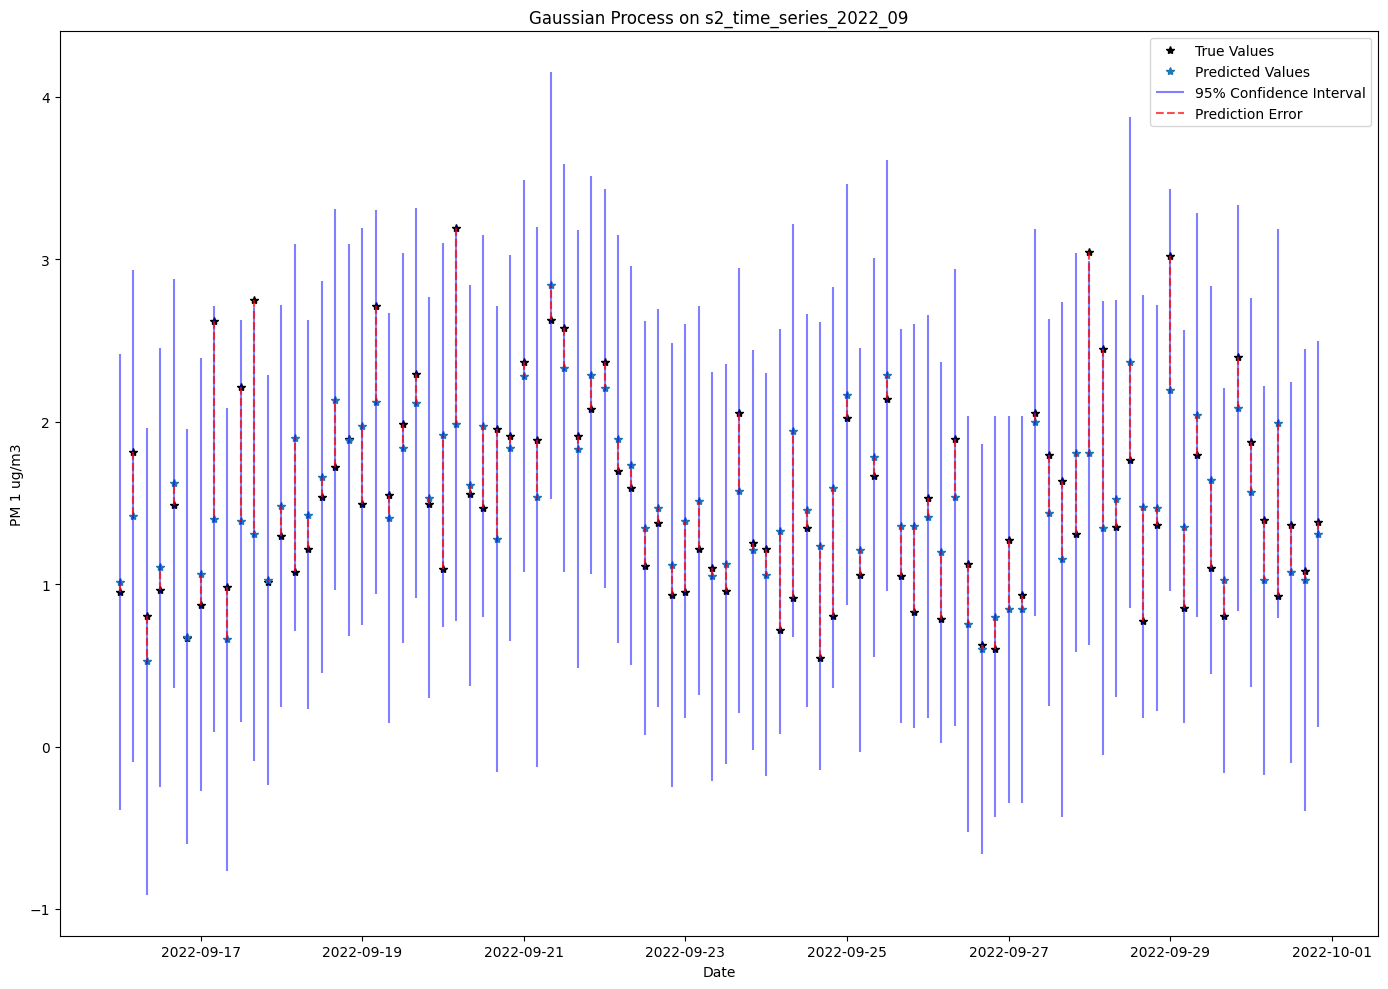

Iter 1/300 - Loss: 4.649 
Iter 11/300 - Loss: 4.258 
Iter 21/300 - Loss: 3.948 
Iter 31/300 - Loss: 3.702 
Iter 41/300 - Loss: 3.554 
Iter 51/300 - Loss: 3.436 
Iter 61/300 - Loss: 3.314 
Iter 71/300 - Loss: 3.201 
Iter 81/300 - Loss: 3.093 
Iter 91/300 - Loss: 2.988 
Iter 101/300 - Loss: 2.888 
Iter 111/300 - Loss: 2.791 
Iter 121/300 - Loss: 2.698 
Iter 131/300 - Loss: 2.608 
Iter 141/300 - Loss: 2.523 
Iter 151/300 - Loss: 2.440 
Iter 161/300 - Loss: 2.361 
Iter 171/300 - Loss: 2.285 
Iter 181/300 - Loss: 2.212 
Iter 191/300 - Loss: 2.143 
Iter 201/300 - Loss: 2.076 
Iter 211/300 - Loss: 2.012 
Iter 221/300 - Loss: 1.951 
Iter 231/300 - Loss: 1.892 
Iter 241/300 - Loss: 1.836 
Iter 251/300 - Loss: 1.782 
Iter 261/300 - Loss: 1.731 
Iter 271/300 - Loss: 1.682 
Iter 281/300 - Loss: 1.636 
Iter 291/300 - Loss: 1.591 
Mean Squared Error: 0.362
Negative Log Likelihood: 84.323
Mean Absolute Percentage Error: 39.325%


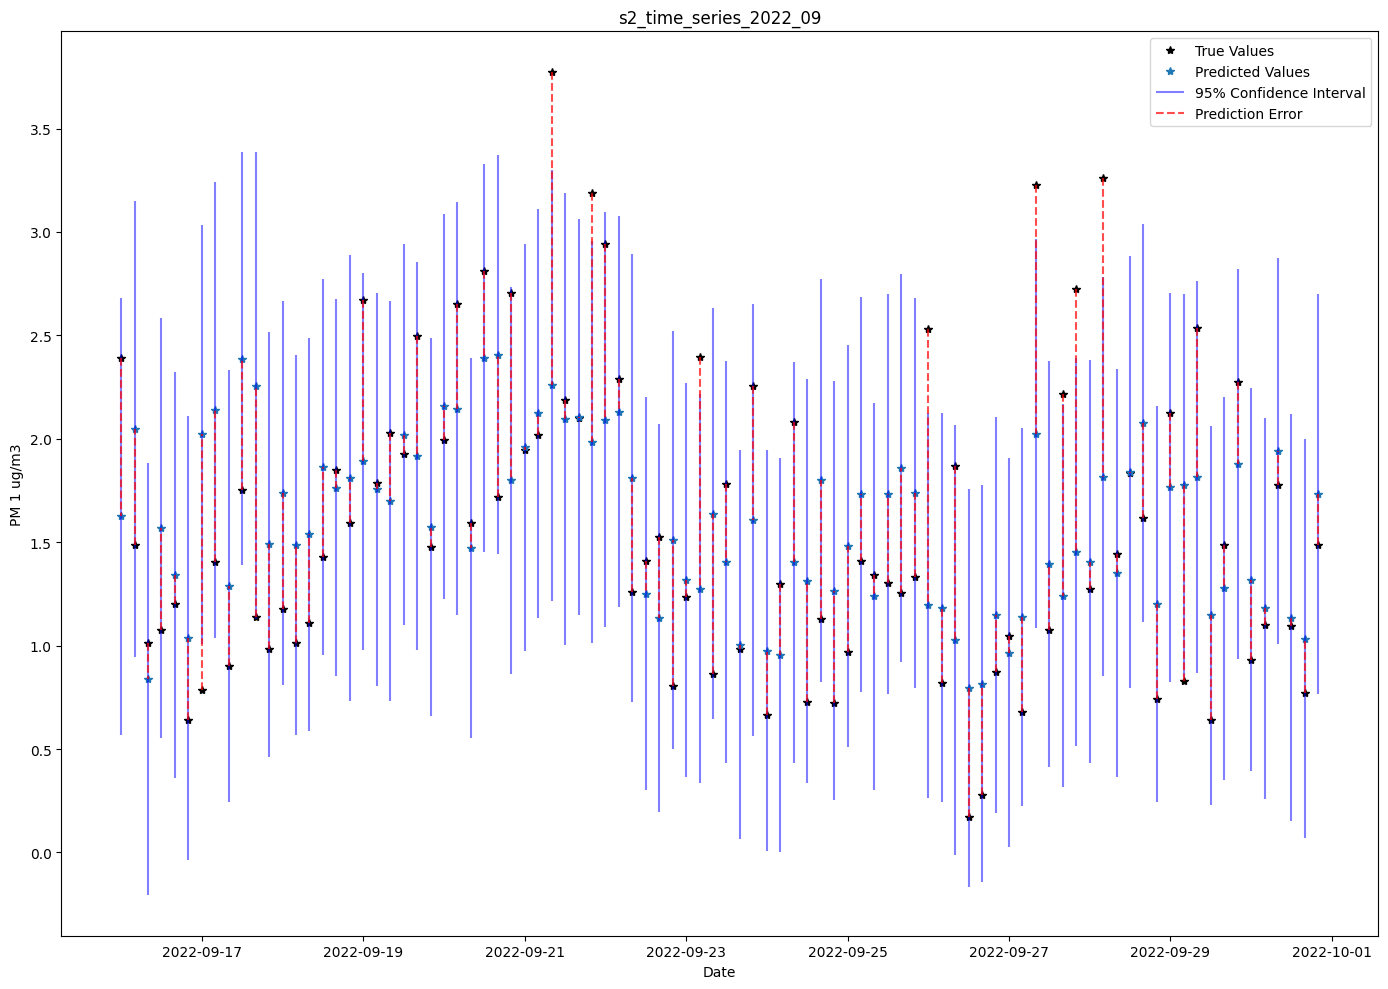

 
GP on s2 time series 2022 10 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 5.934 
Iter 11/300 - Loss: 5.450 
Iter 21/300 - Loss: 5.164 
Iter 31/300 - Loss: 4.924 
Iter 41/300 - Loss: 4.720 
Iter 51/300 - Loss: 4.547 
Iter 61/300 - Loss: 4.388 
Iter 71/300 - Loss: 4.238 
Iter 81/300 - Loss: 4.094 
Iter 91/300 - Loss: 3.955 
Iter 101/300 - Loss: 3.821 
Iter 111/300 - Loss: 3.692 
Iter 121/300 - Loss: 3.567 
Iter 131/300 - Loss: 3.448 
Iter 141/300 - Loss: 3.334 
Iter 151/300 - Loss: 3.224 
Iter 161/300 - Loss: 3.118 
Iter 171/300 - Loss: 3.017 
Iter 181/300 - Loss: 2.920 
Iter 191/300 - Loss: 2.826 
Iter 201/300 - Loss: 2.737 
Iter 211/300 - Loss: 2.651 
Iter 221/300 - Loss: 2.569 
Iter 231/300 - Loss: 2.490 
Iter 241/300 - Loss: 2.415 
Iter 251/300 - Loss: 2.343 
Iter 261/300 - Loss: 2.274 
Iter 271/300 - Loss: 2.209 
Iter 281/300 - Loss: 2.146 
Iter 291/300 - Loss: 2.086 
Mean Squared Error: 0.492
Negative Log Likelihood: 73.717
Mean Absolute Percentage Error

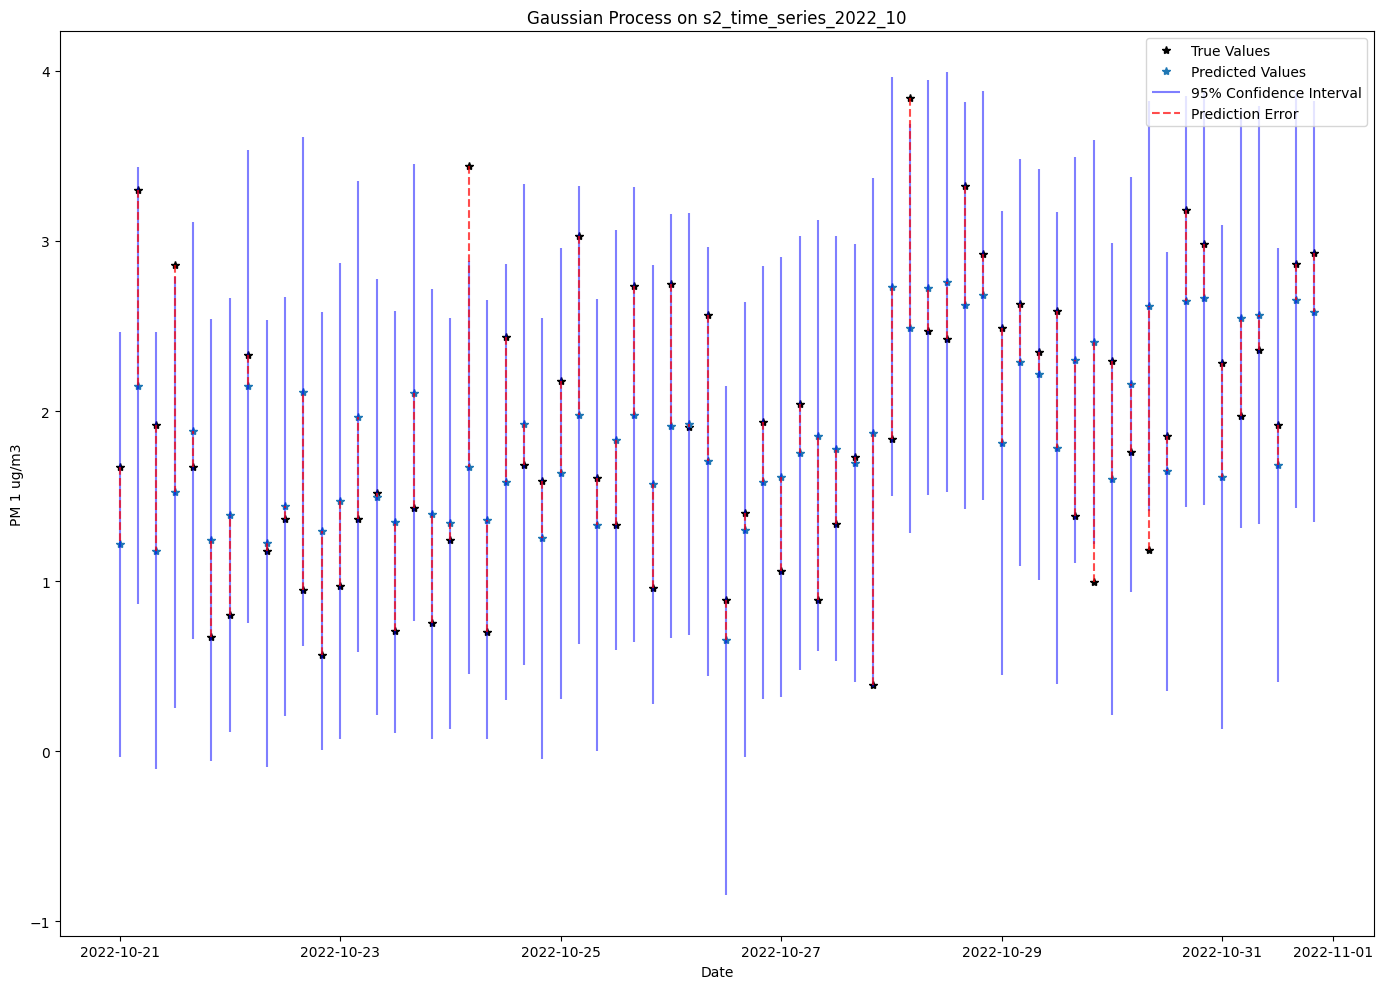

Iter 1/300 - Loss: 6.075 
Iter 11/300 - Loss: 5.624 
Iter 21/300 - Loss: 5.331 
Iter 31/300 - Loss: 5.138 
Iter 41/300 - Loss: 4.944 
Iter 51/300 - Loss: 4.766 
Iter 61/300 - Loss: 4.597 
Iter 71/300 - Loss: 4.437 
Iter 81/300 - Loss: 4.284 
Iter 91/300 - Loss: 4.137 
Iter 101/300 - Loss: 3.996 
Iter 111/300 - Loss: 3.861 
Iter 121/300 - Loss: 3.731 
Iter 131/300 - Loss: 3.608 
Iter 141/300 - Loss: 3.489 
Iter 151/300 - Loss: 3.375 
Iter 161/300 - Loss: 3.267 
Iter 171/300 - Loss: 3.163 
Iter 181/300 - Loss: 3.063 
Iter 191/300 - Loss: 2.968 
Iter 201/300 - Loss: 2.877 
Iter 211/300 - Loss: 2.790 
Iter 221/300 - Loss: 2.707 
Iter 231/300 - Loss: 2.628 
Iter 241/300 - Loss: 2.552 
Iter 251/300 - Loss: 2.479 
Iter 261/300 - Loss: 2.410 
Iter 271/300 - Loss: 2.344 
Iter 281/300 - Loss: 2.282 
Iter 291/300 - Loss: 2.222 
Mean Squared Error: 0.349
Negative Log Likelihood: 64.275
Mean Absolute Percentage Error: 36.150%


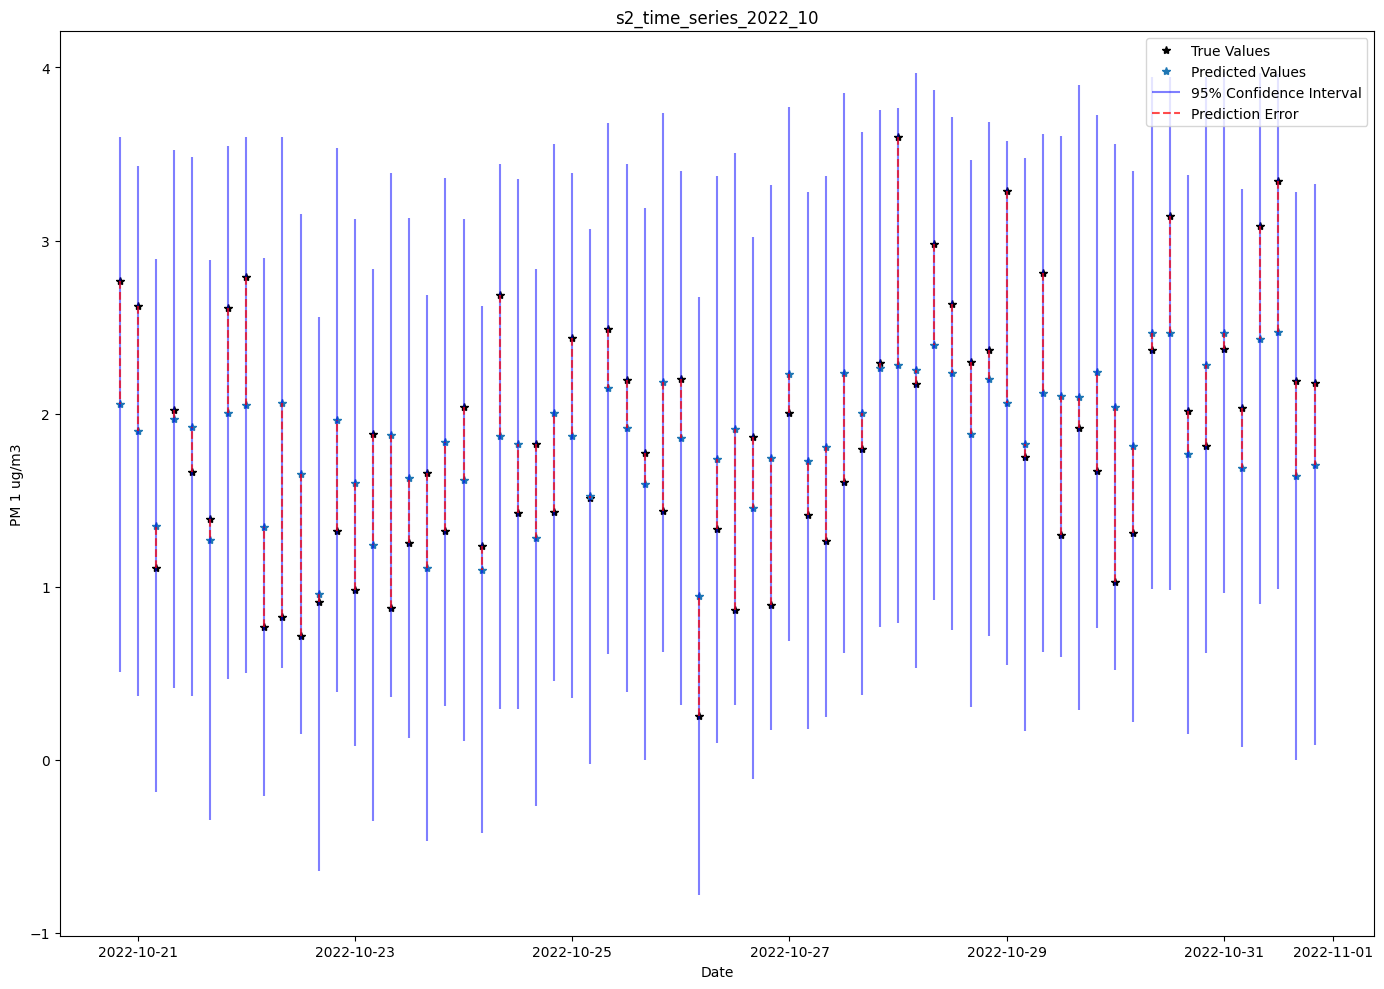

 
GP on s2 time series 2022 11 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 6.632 
Iter 11/300 - Loss: 5.886 
Iter 21/300 - Loss: 5.487 
Iter 31/300 - Loss: 5.154 
Iter 41/300 - Loss: 4.861 
Iter 51/300 - Loss: 4.648 
Iter 61/300 - Loss: 4.486 
Iter 71/300 - Loss: 4.331 
Iter 81/300 - Loss: 4.181 
Iter 91/300 - Loss: 4.038 
Iter 101/300 - Loss: 3.902 
Iter 111/300 - Loss: 3.771 
Iter 121/300 - Loss: 3.645 
Iter 131/300 - Loss: 3.525 
Iter 141/300 - Loss: 3.410 
Iter 151/300 - Loss: 3.299 
Iter 161/300 - Loss: 3.193 
Iter 171/300 - Loss: 3.091 
Iter 181/300 - Loss: 2.994 
Iter 191/300 - Loss: 2.900 
Iter 201/300 - Loss: 2.810 
Iter 211/300 - Loss: 2.724 
Iter 221/300 - Loss: 2.641 
Iter 231/300 - Loss: 2.562 
Iter 241/300 - Loss: 2.486 
Iter 251/300 - Loss: 2.413 
Iter 261/300 - Loss: 2.344 
Iter 271/300 - Loss: 2.277 
Iter 281/300 - Loss: 2.213 
Iter 291/300 - Loss: 2.152 
Mean Squared Error: 0.421
Negative Log Likelihood: 66.165
Mean Absolute Percentage Error

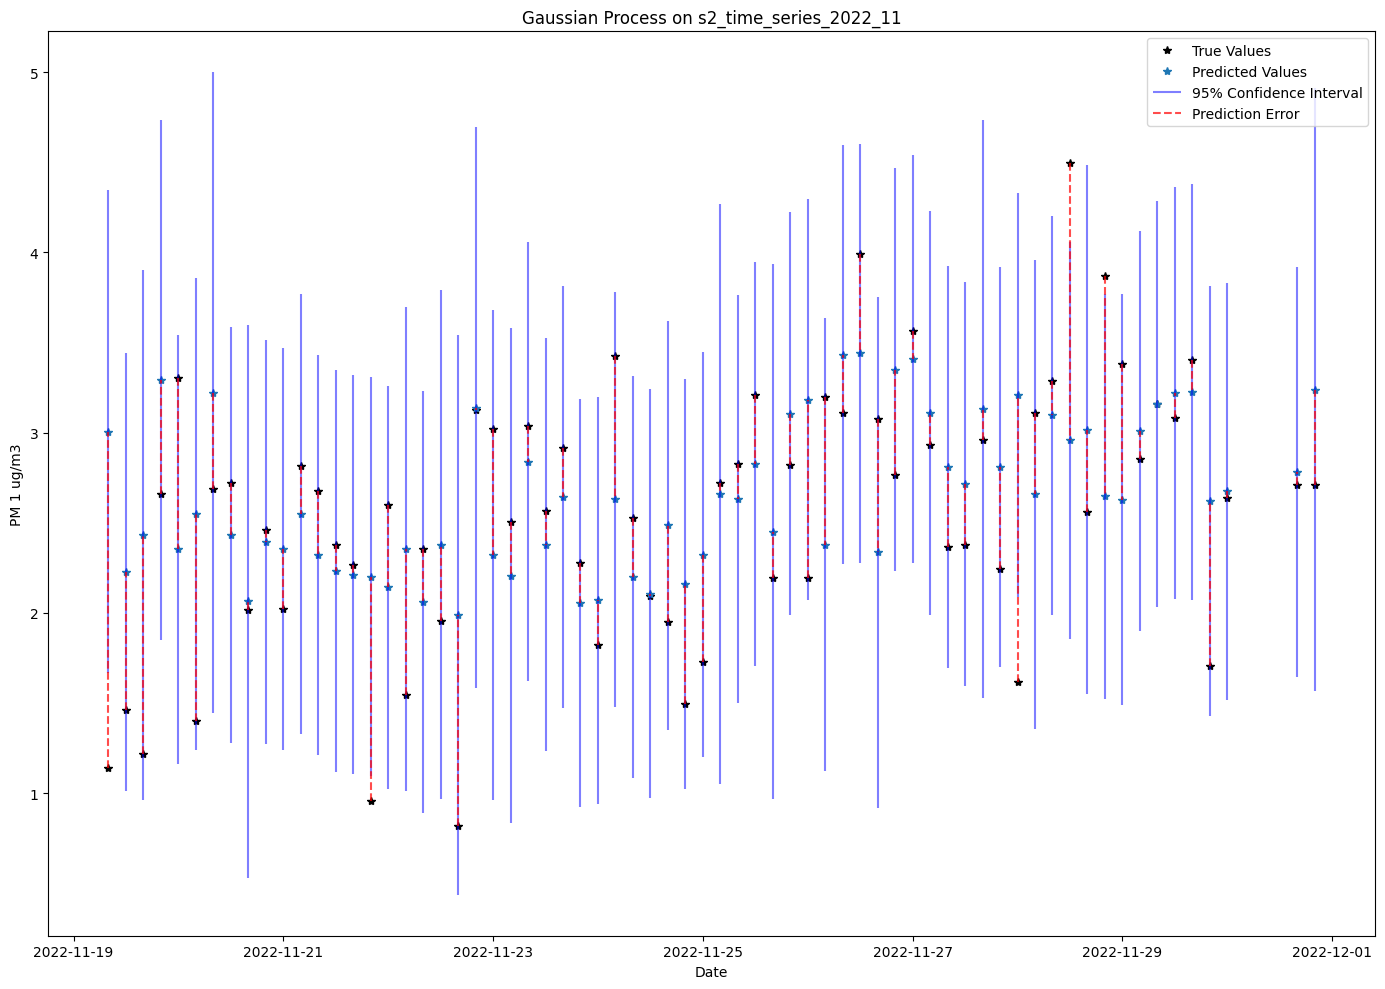

Iter 1/300 - Loss: 6.479 
Iter 11/300 - Loss: 5.836 
Iter 21/300 - Loss: 5.452 
Iter 31/300 - Loss: 5.133 
Iter 41/300 - Loss: 4.865 
Iter 51/300 - Loss: 4.666 
Iter 61/300 - Loss: 4.489 
Iter 71/300 - Loss: 4.327 
Iter 81/300 - Loss: 4.177 
Iter 91/300 - Loss: 4.034 
Iter 101/300 - Loss: 3.899 
Iter 111/300 - Loss: 3.771 
Iter 121/300 - Loss: 3.648 
Iter 131/300 - Loss: 3.530 
Iter 141/300 - Loss: 3.417 
Iter 151/300 - Loss: 3.308 
Iter 161/300 - Loss: 3.204 
Iter 171/300 - Loss: 3.104 
Iter 181/300 - Loss: 3.008 
Iter 191/300 - Loss: 2.916 
Iter 201/300 - Loss: 2.827 
Iter 211/300 - Loss: 2.742 
Iter 221/300 - Loss: 2.661 
Iter 231/300 - Loss: 2.583 
Iter 241/300 - Loss: 2.508 
Iter 251/300 - Loss: 2.437 
Iter 261/300 - Loss: 2.368 
Iter 271/300 - Loss: 2.302 
Iter 281/300 - Loss: 2.240 
Iter 291/300 - Loss: 2.180 
Mean Squared Error: 0.396
Negative Log Likelihood: 62.543
Mean Absolute Percentage Error: 19.862%


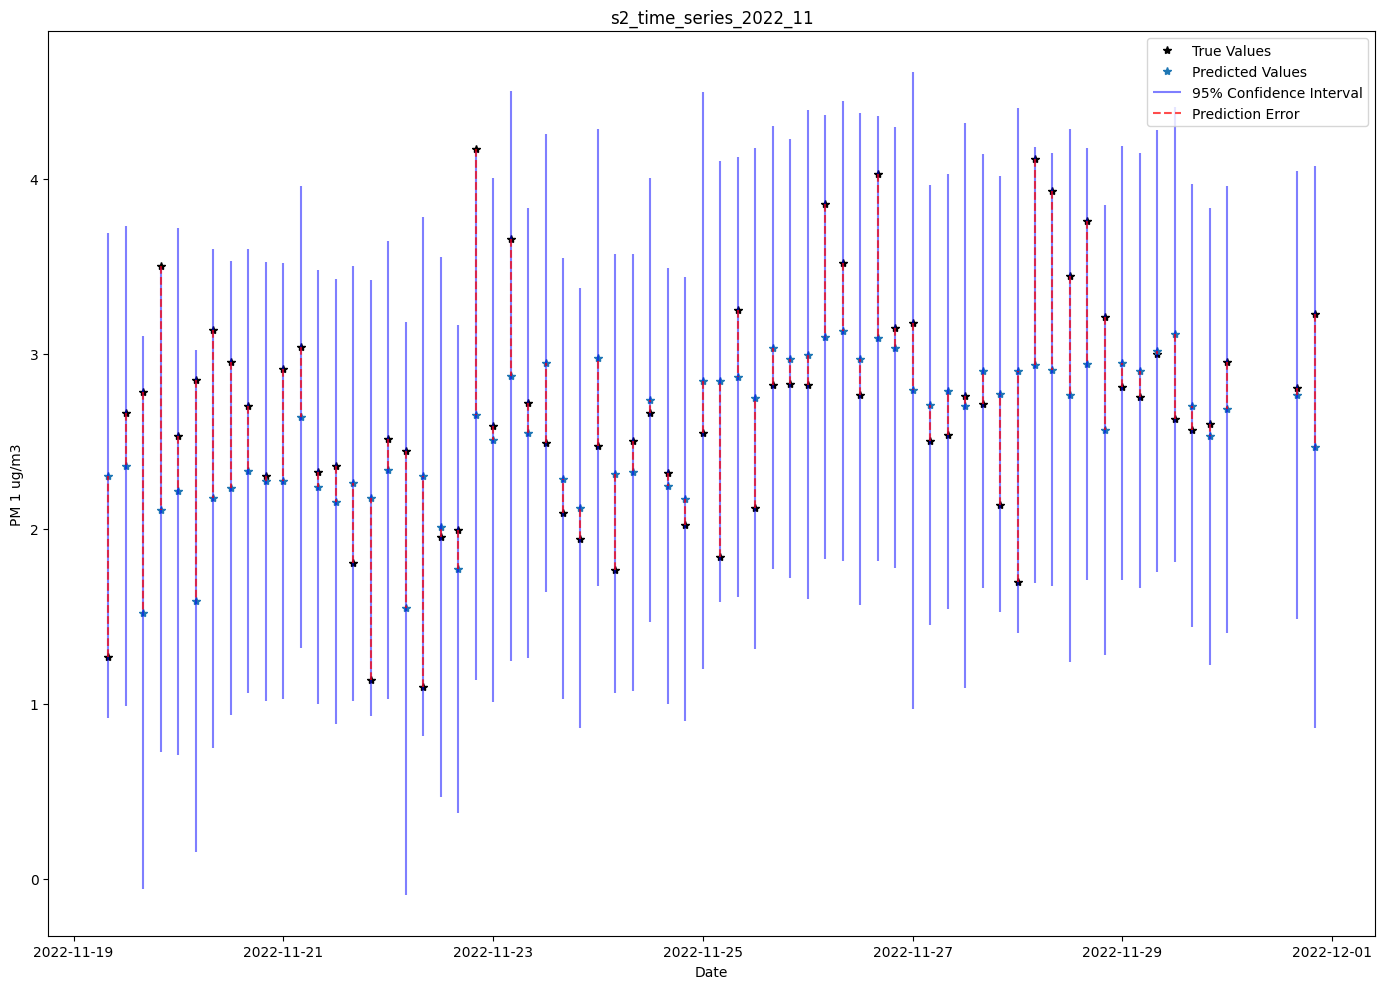

 
GP on s2 time series 2022 12 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 5.197 
Iter 11/300 - Loss: 4.659 
Iter 21/300 - Loss: 4.311 
Iter 31/300 - Loss: 4.096 
Iter 41/300 - Loss: 3.942 
Iter 51/300 - Loss: 3.812 
Iter 61/300 - Loss: 3.691 
Iter 71/300 - Loss: 3.578 
Iter 81/300 - Loss: 3.470 
Iter 91/300 - Loss: 3.367 
Iter 101/300 - Loss: 3.268 
Iter 111/300 - Loss: 3.172 
Iter 121/300 - Loss: 3.079 
Iter 131/300 - Loss: 2.990 
Iter 141/300 - Loss: 2.904 
Iter 151/300 - Loss: 2.820 
Iter 161/300 - Loss: 2.740 
Iter 171/300 - Loss: 2.662 
Iter 181/300 - Loss: 2.587 
Iter 191/300 - Loss: 2.515 
Iter 201/300 - Loss: 2.445 
Iter 211/300 - Loss: 2.378 
Iter 221/300 - Loss: 2.313 
Iter 231/300 - Loss: 2.251 
Iter 241/300 - Loss: 2.191 
Iter 251/300 - Loss: 2.134 
Iter 261/300 - Loss: 2.079 
Iter 271/300 - Loss: 2.026 
Iter 281/300 - Loss: 1.975 
Iter 291/300 - Loss: 1.926 
Mean Squared Error: 0.401
Negative Log Likelihood: 82.634
Mean Absolute Percentage Error

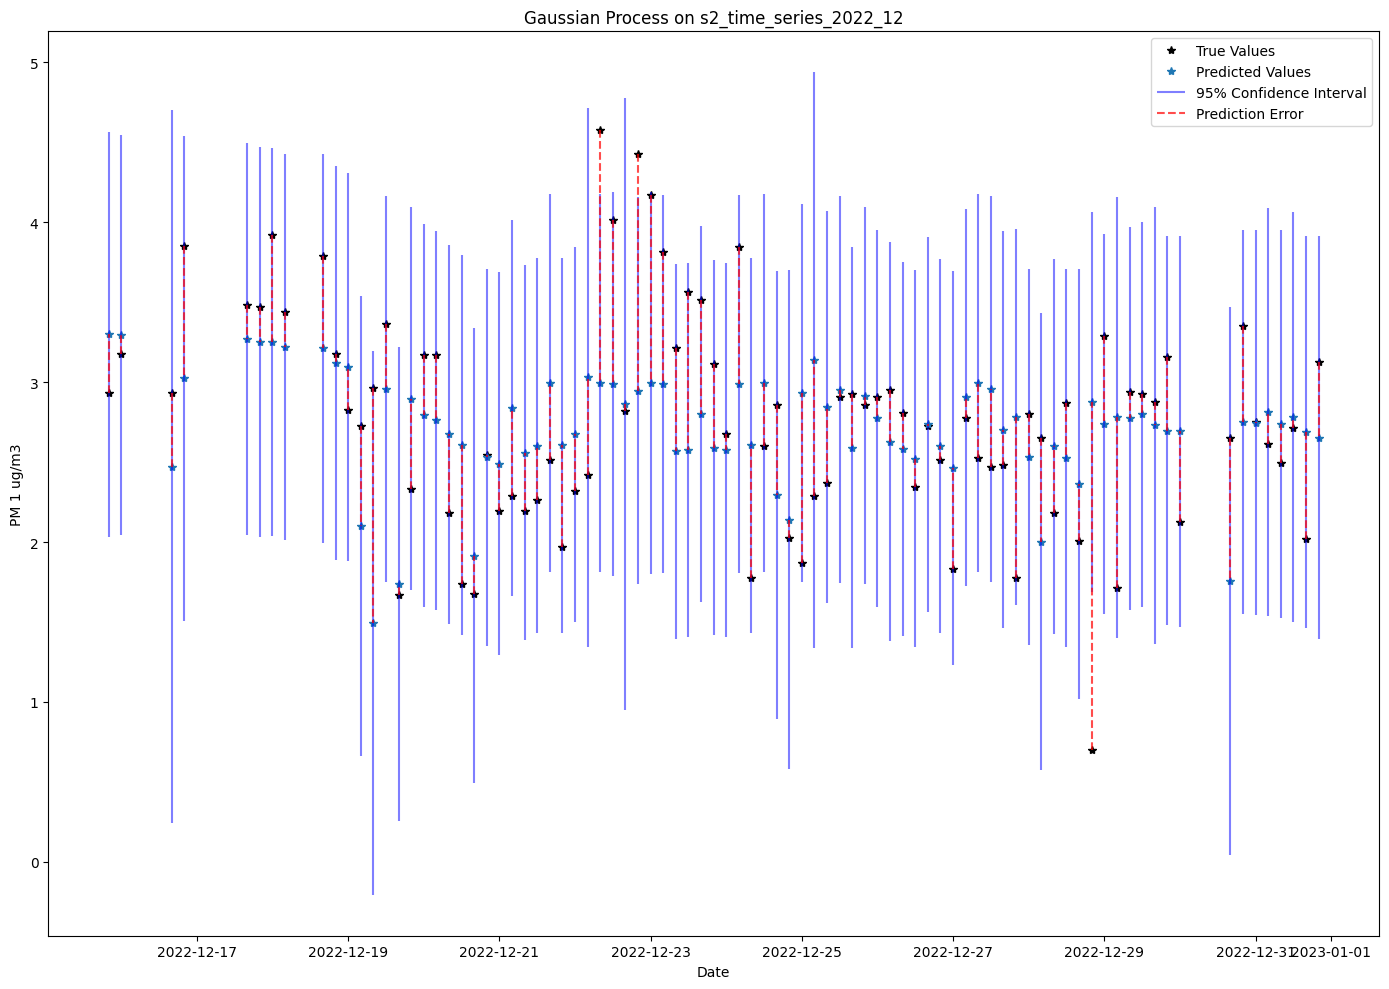

Iter 1/300 - Loss: 5.228 
Iter 11/300 - Loss: 4.676 
Iter 21/300 - Loss: 4.405 
Iter 31/300 - Loss: 4.220 
Iter 41/300 - Loss: 4.063 
Iter 51/300 - Loss: 3.927 
Iter 61/300 - Loss: 3.795 
Iter 71/300 - Loss: 3.670 
Iter 81/300 - Loss: 3.550 
Iter 91/300 - Loss: 3.437 
Iter 101/300 - Loss: 3.329 
Iter 111/300 - Loss: 3.225 
Iter 121/300 - Loss: 3.127 
Iter 131/300 - Loss: 3.032 
Iter 141/300 - Loss: 2.941 
Iter 151/300 - Loss: 2.854 
Iter 161/300 - Loss: 2.771 
Iter 171/300 - Loss: 2.690 
Iter 181/300 - Loss: 2.613 
Iter 191/300 - Loss: 2.539 
Iter 201/300 - Loss: 2.468 
Iter 211/300 - Loss: 2.400 
Iter 221/300 - Loss: 2.334 
Iter 231/300 - Loss: 2.272 
Iter 241/300 - Loss: 2.211 
Iter 251/300 - Loss: 2.154 
Iter 261/300 - Loss: 2.099 
Iter 271/300 - Loss: 2.046 
Iter 281/300 - Loss: 1.995 
Iter 291/300 - Loss: 1.947 
Mean Squared Error: 0.357
Negative Log Likelihood: 78.343
Mean Absolute Percentage Error: 20.364%


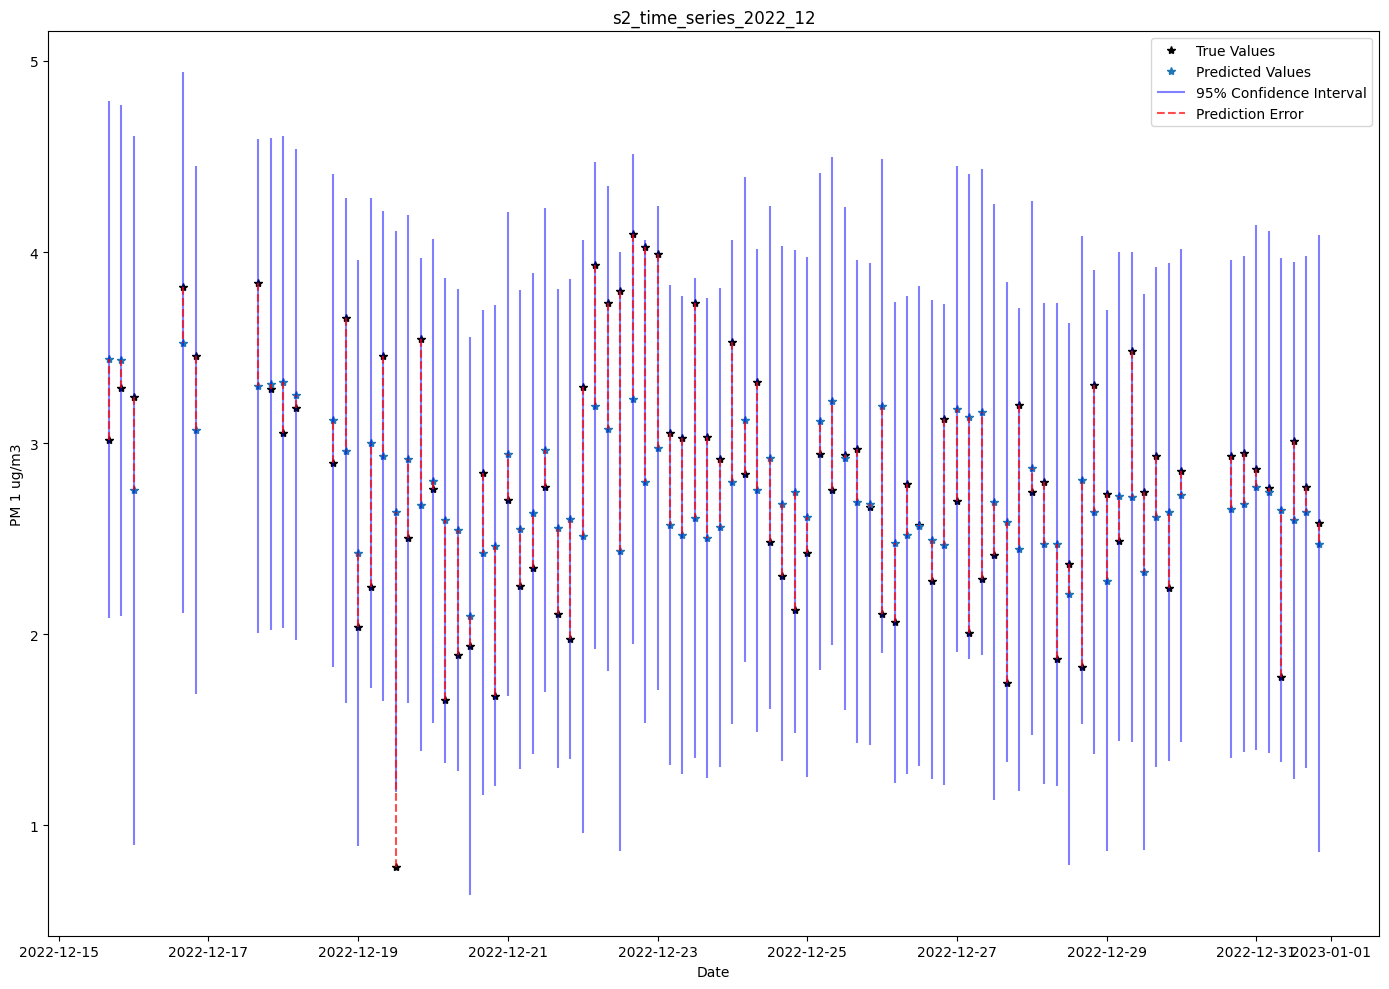

 
GP on s2 time series 2023 01 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 6.362 
Iter 11/300 - Loss: 5.878 
Iter 21/300 - Loss: 5.622 
Iter 31/300 - Loss: 5.404 
Iter 41/300 - Loss: 5.197 
Iter 51/300 - Loss: 4.998 
Iter 61/300 - Loss: 4.805 
Iter 71/300 - Loss: 4.620 
Iter 81/300 - Loss: 4.442 
Iter 91/300 - Loss: 4.273 
Iter 101/300 - Loss: 4.111 
Iter 111/300 - Loss: 3.957 
Iter 121/300 - Loss: 3.811 
Iter 131/300 - Loss: 3.671 
Iter 141/300 - Loss: 3.537 
Iter 151/300 - Loss: 3.409 
Iter 161/300 - Loss: 3.287 
Iter 171/300 - Loss: 3.170 
Iter 181/300 - Loss: 3.059 
Iter 191/300 - Loss: 2.952 
Iter 201/300 - Loss: 2.850 
Iter 211/300 - Loss: 2.753 
Iter 221/300 - Loss: 2.660 
Iter 231/300 - Loss: 2.571 
Iter 241/300 - Loss: 2.486 
Iter 251/300 - Loss: 2.405 
Iter 261/300 - Loss: 2.328 
Iter 271/300 - Loss: 2.254 
Iter 281/300 - Loss: 2.184 
Iter 291/300 - Loss: 2.118 
Mean Squared Error: 0.308
Negative Log Likelihood: 49.164
Mean Absolute Percentage Error

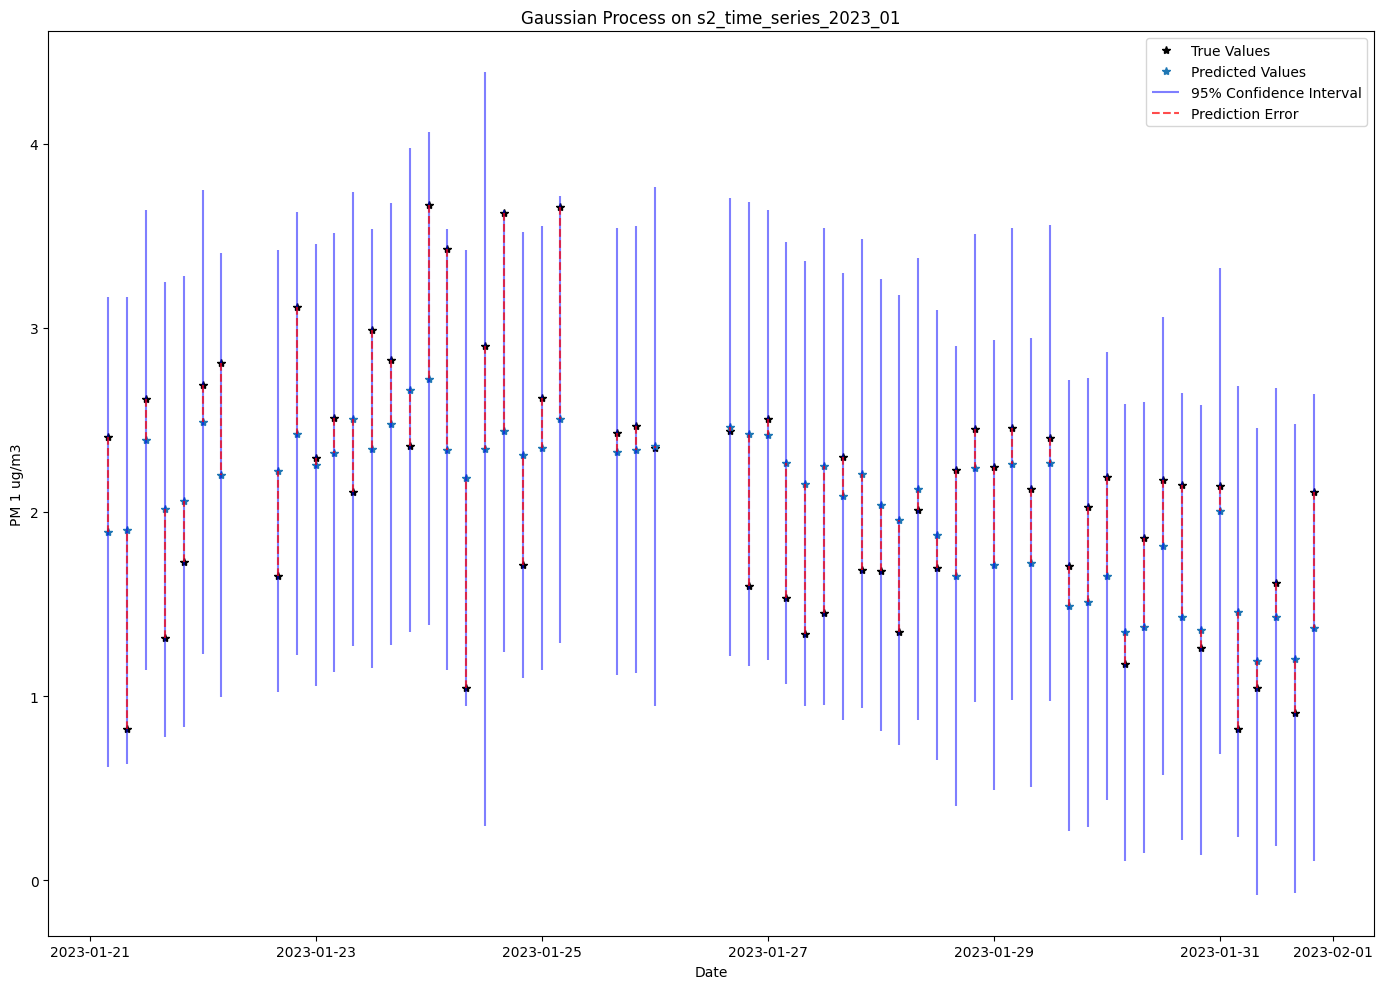

Iter 1/300 - Loss: 6.391 
Iter 11/300 - Loss: 5.862 
Iter 21/300 - Loss: 5.550 
Iter 31/300 - Loss: 5.368 
Iter 41/300 - Loss: 5.216 
Iter 51/300 - Loss: 5.050 
Iter 61/300 - Loss: 4.882 
Iter 71/300 - Loss: 4.709 
Iter 81/300 - Loss: 4.536 
Iter 91/300 - Loss: 4.367 
Iter 101/300 - Loss: 4.202 
Iter 111/300 - Loss: 4.044 
Iter 121/300 - Loss: 3.892 
Iter 131/300 - Loss: 3.747 
Iter 141/300 - Loss: 3.608 
Iter 151/300 - Loss: 3.475 
Iter 161/300 - Loss: 3.348 
Iter 171/300 - Loss: 3.226 
Iter 181/300 - Loss: 3.110 
Iter 191/300 - Loss: 2.999 
Iter 201/300 - Loss: 2.892 
Iter 211/300 - Loss: 2.791 
Iter 221/300 - Loss: 2.694 
Iter 231/300 - Loss: 2.601 
Iter 241/300 - Loss: 2.513 
Iter 251/300 - Loss: 2.428 
Iter 261/300 - Loss: 2.348 
Iter 271/300 - Loss: 2.271 
Iter 281/300 - Loss: 2.198 
Iter 291/300 - Loss: 2.129 
Mean Squared Error: 0.281
Negative Log Likelihood: 50.649
Mean Absolute Percentage Error: 27.165%


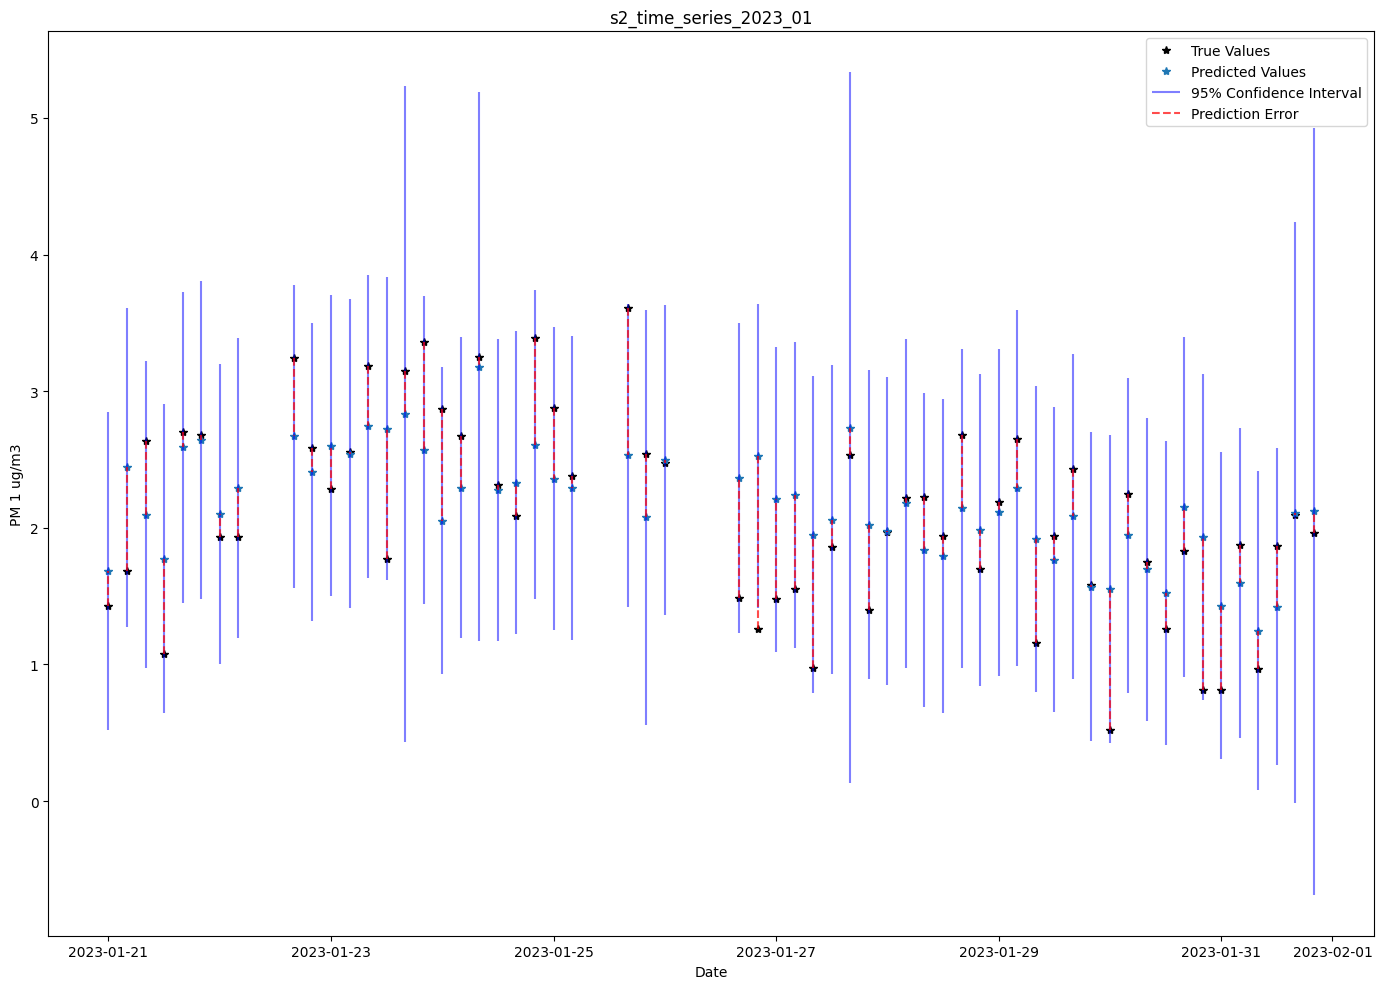

 
GP on s2 time series 2023 02 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 5.555 
Iter 11/300 - Loss: 5.009 
Iter 21/300 - Loss: 4.694 
Iter 31/300 - Loss: 4.526 
Iter 41/300 - Loss: 4.377 
Iter 51/300 - Loss: 4.230 
Iter 61/300 - Loss: 4.078 
Iter 71/300 - Loss: 3.929 
Iter 81/300 - Loss: 3.787 
Iter 91/300 - Loss: 3.652 
Iter 101/300 - Loss: 3.524 
Iter 111/300 - Loss: 3.403 
Iter 121/300 - Loss: 3.289 
Iter 131/300 - Loss: 3.180 
Iter 141/300 - Loss: 3.077 
Iter 151/300 - Loss: 2.978 
Iter 161/300 - Loss: 2.884 
Iter 171/300 - Loss: 2.794 
Iter 181/300 - Loss: 2.708 
Iter 191/300 - Loss: 2.626 
Iter 201/300 - Loss: 2.547 
Iter 211/300 - Loss: 2.472 
Iter 221/300 - Loss: 2.401 
Iter 231/300 - Loss: 2.332 
Iter 241/300 - Loss: 2.267 
Iter 251/300 - Loss: 2.205 
Iter 261/300 - Loss: 2.145 
Iter 271/300 - Loss: 2.089 
Iter 281/300 - Loss: 2.035 
Iter 291/300 - Loss: 1.983 
Mean Squared Error: 0.509
Negative Log Likelihood: 85.195
Mean Absolute Percentage Error

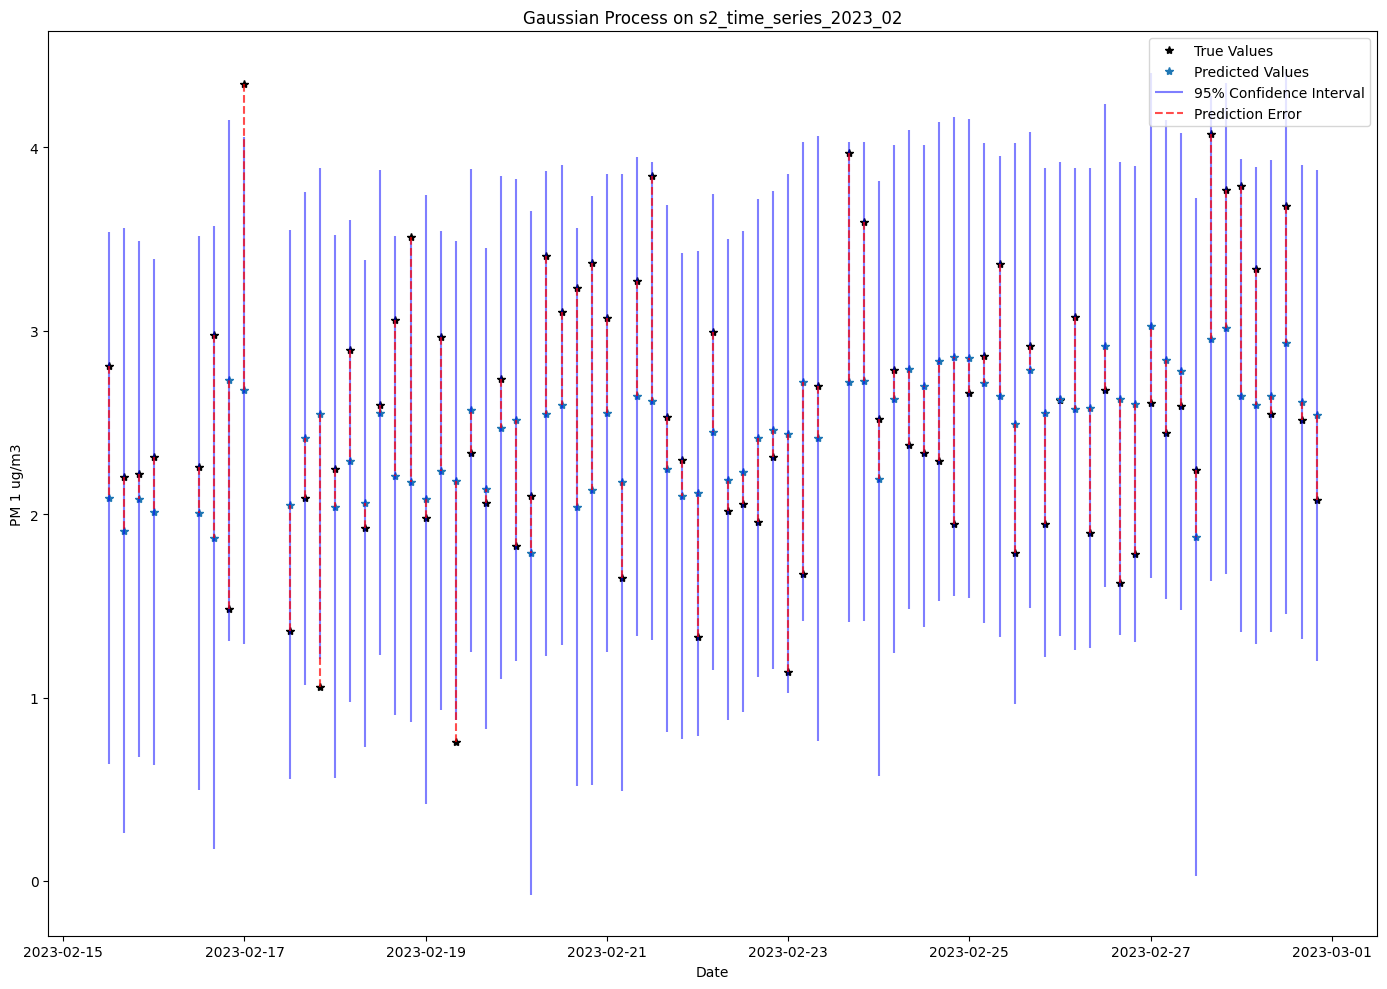

Iter 1/300 - Loss: 5.767 
Iter 11/300 - Loss: 5.254 
Iter 21/300 - Loss: 4.943 
Iter 31/300 - Loss: 4.700 
Iter 41/300 - Loss: 4.506 
Iter 51/300 - Loss: 4.335 
Iter 61/300 - Loss: 4.179 
Iter 71/300 - Loss: 4.034 
Iter 81/300 - Loss: 3.899 
Iter 91/300 - Loss: 3.772 
Iter 101/300 - Loss: 3.652 
Iter 111/300 - Loss: 3.538 
Iter 121/300 - Loss: 3.429 
Iter 131/300 - Loss: 3.324 
Iter 141/300 - Loss: 3.224 
Iter 151/300 - Loss: 3.129 
Iter 161/300 - Loss: 3.037 
Iter 171/300 - Loss: 2.949 
Iter 181/300 - Loss: 2.864 
Iter 191/300 - Loss: 2.783 
Iter 201/300 - Loss: 2.705 
Iter 211/300 - Loss: 2.631 
Iter 221/300 - Loss: 2.559 
Iter 231/300 - Loss: 2.491 
Iter 241/300 - Loss: 2.425 
Iter 251/300 - Loss: 2.362 
Iter 261/300 - Loss: 2.302 
Iter 271/300 - Loss: 2.245 
Iter 281/300 - Loss: 2.190 
Iter 291/300 - Loss: 2.137 
Mean Squared Error: 0.428
Negative Log Likelihood: 78.806
Mean Absolute Percentage Error: 24.152%


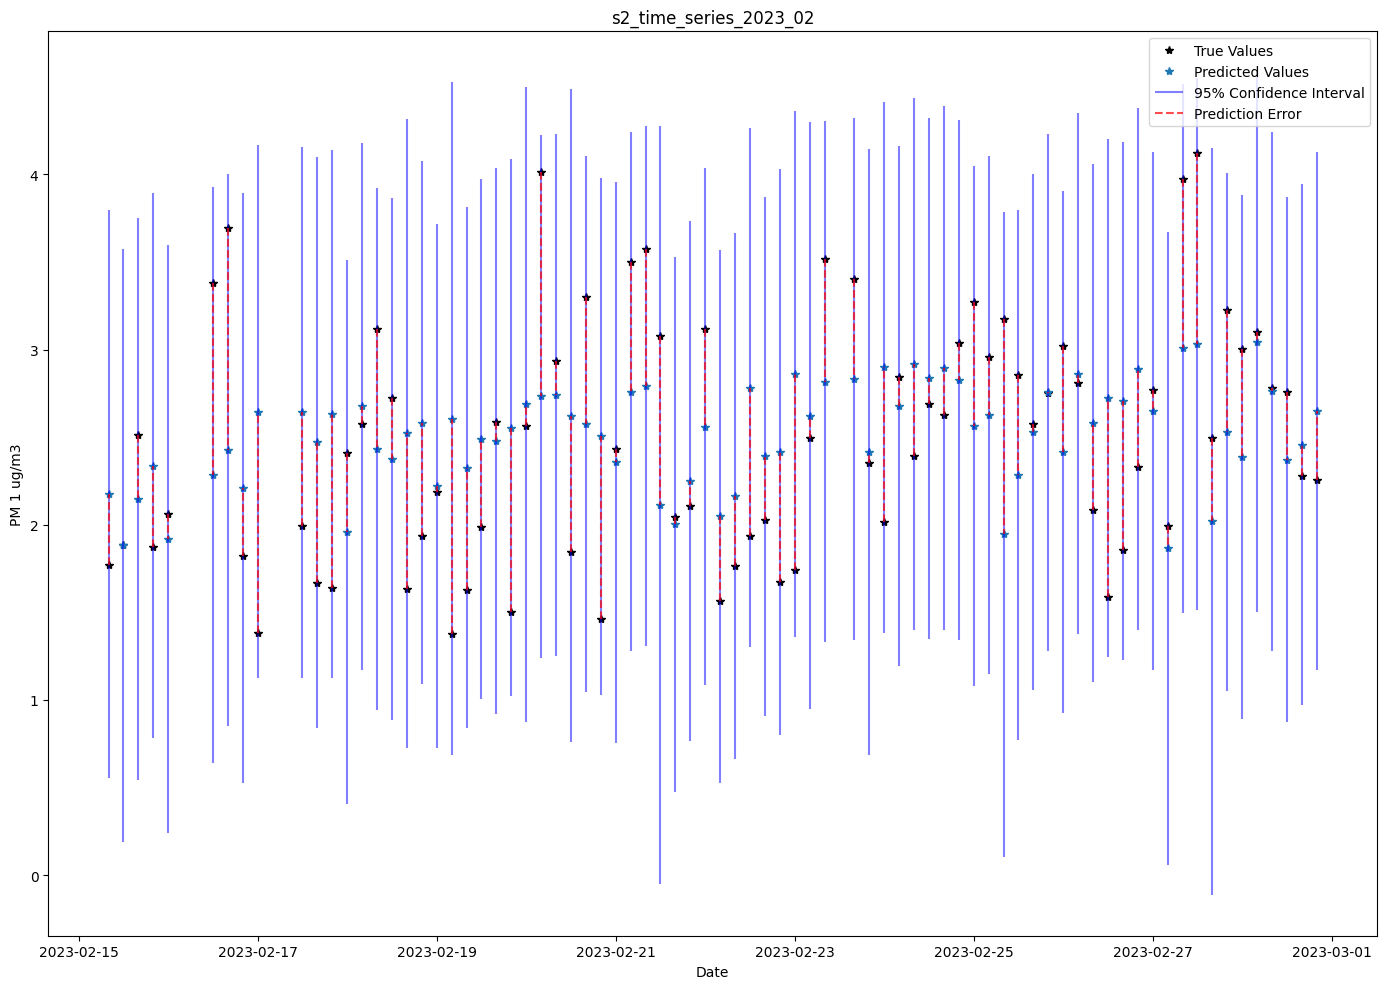

 
GP on s2 time series 2023 03 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 4.990 
Iter 11/300 - Loss: 4.558 
Iter 21/300 - Loss: 4.282 
Iter 31/300 - Loss: 4.087 
Iter 41/300 - Loss: 3.921 
Iter 51/300 - Loss: 3.778 
Iter 61/300 - Loss: 3.644 
Iter 71/300 - Loss: 3.519 
Iter 81/300 - Loss: 3.402 
Iter 91/300 - Loss: 3.291 
Iter 101/300 - Loss: 3.187 
Iter 111/300 - Loss: 3.089 
Iter 121/300 - Loss: 2.995 
Iter 131/300 - Loss: 2.905 
Iter 141/300 - Loss: 2.820 
Iter 151/300 - Loss: 2.738 
Iter 161/300 - Loss: 2.660 
Iter 171/300 - Loss: 2.585 
Iter 181/300 - Loss: 2.513 
Iter 191/300 - Loss: 2.444 
Iter 201/300 - Loss: 2.378 
Iter 211/300 - Loss: 2.315 
Iter 221/300 - Loss: 2.255 
Iter 231/300 - Loss: 2.197 
Iter 241/300 - Loss: 2.141 
Iter 251/300 - Loss: 2.089 
Iter 261/300 - Loss: 2.038 
Iter 271/300 - Loss: 1.990 
Iter 281/300 - Loss: 1.944 
Iter 291/300 - Loss: 1.900 
Mean Squared Error: 0.331
Negative Log Likelihood: 80.991
Mean Absolute Percentage Error

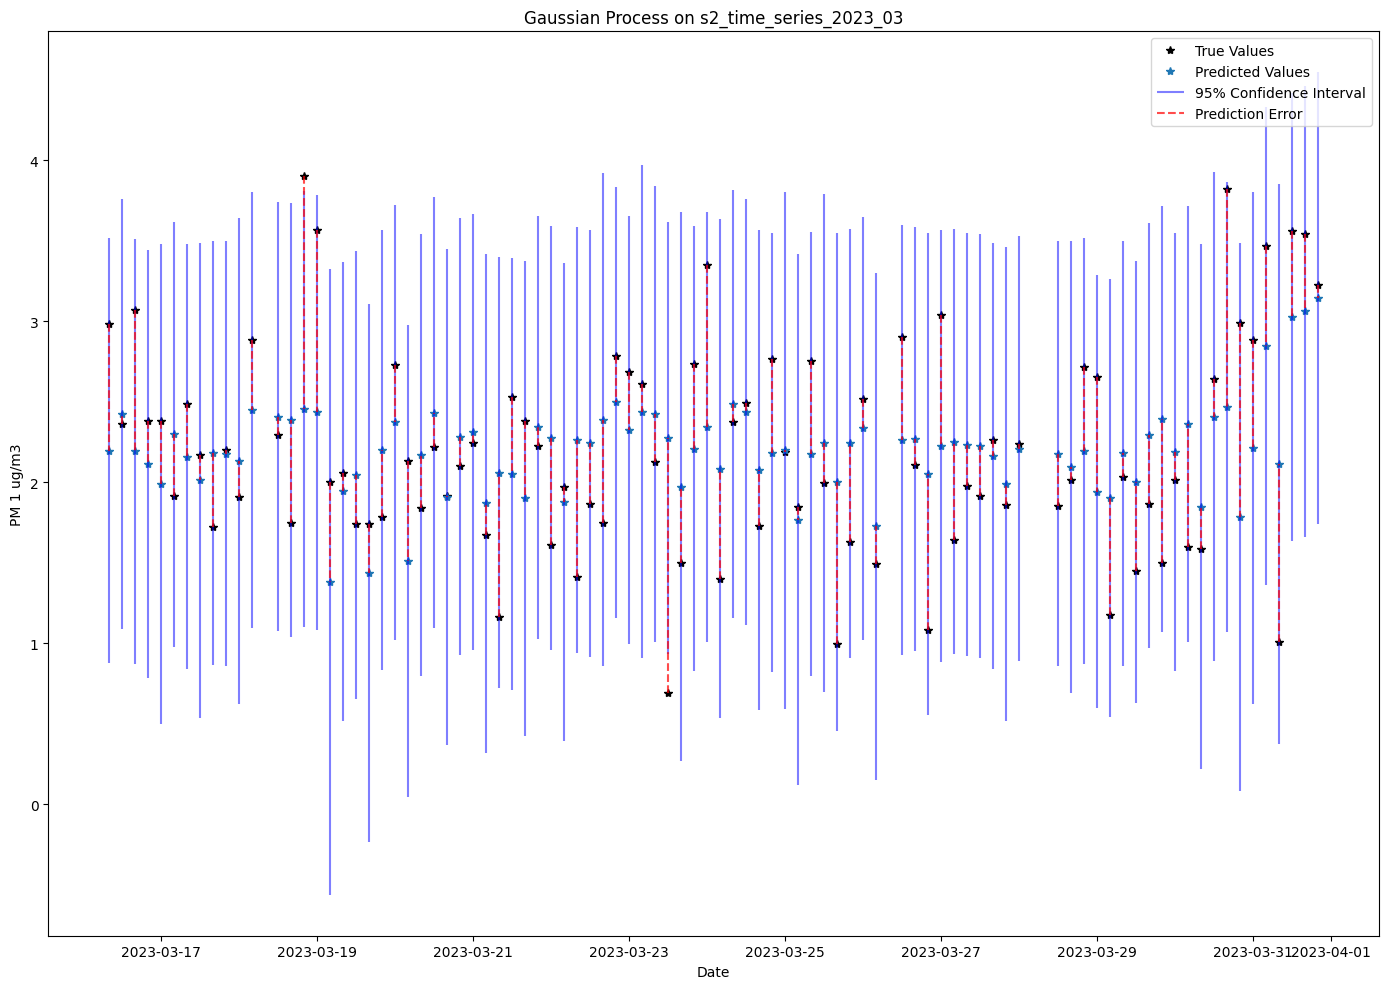

Iter 1/300 - Loss: 4.935 
Iter 11/300 - Loss: 4.482 
Iter 21/300 - Loss: 4.180 
Iter 31/300 - Loss: 3.996 
Iter 41/300 - Loss: 3.831 
Iter 51/300 - Loss: 3.684 
Iter 61/300 - Loss: 3.551 
Iter 71/300 - Loss: 3.428 
Iter 81/300 - Loss: 3.312 
Iter 91/300 - Loss: 3.203 
Iter 101/300 - Loss: 3.099 
Iter 111/300 - Loss: 3.000 
Iter 121/300 - Loss: 2.906 
Iter 131/300 - Loss: 2.816 
Iter 141/300 - Loss: 2.730 
Iter 151/300 - Loss: 2.648 
Iter 161/300 - Loss: 2.570 
Iter 171/300 - Loss: 2.494 
Iter 181/300 - Loss: 2.422 
Iter 191/300 - Loss: 2.353 
Iter 201/300 - Loss: 2.287 
Iter 211/300 - Loss: 2.224 
Iter 221/300 - Loss: 2.163 
Iter 231/300 - Loss: 2.105 
Iter 241/300 - Loss: 2.050 
Iter 251/300 - Loss: 1.997 
Iter 261/300 - Loss: 1.946 
Iter 271/300 - Loss: 1.897 
Iter 281/300 - Loss: 1.851 
Iter 291/300 - Loss: 1.807 
Mean Squared Error: 0.372
Negative Log Likelihood: 87.695
Mean Absolute Percentage Error: 30.163%


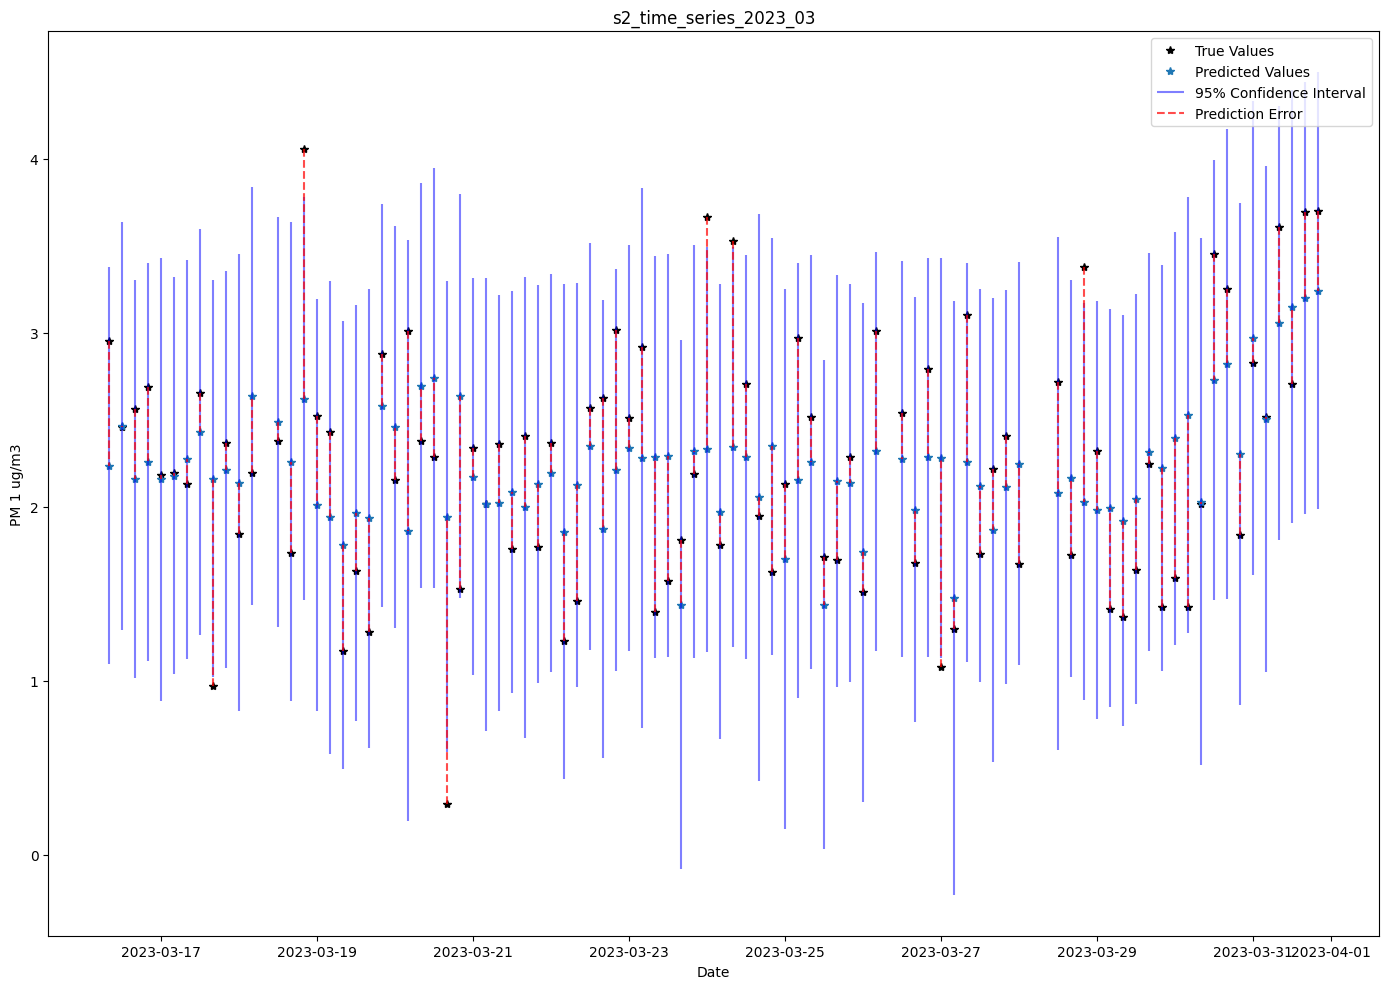

 
GP on s2 time series 2023 04 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 5.635 
Iter 11/300 - Loss: 5.010 
Iter 21/300 - Loss: 4.761 
Iter 31/300 - Loss: 4.580 
Iter 41/300 - Loss: 4.292 
Iter 51/300 - Loss: 4.039 
Iter 61/300 - Loss: 3.836 
Iter 71/300 - Loss: 3.657 
Iter 81/300 - Loss: 3.504 
Iter 91/300 - Loss: 3.368 
Iter 101/300 - Loss: 3.245 
Iter 111/300 - Loss: 3.132 
Iter 121/300 - Loss: 3.026 
Iter 131/300 - Loss: 2.927 
Iter 141/300 - Loss: 2.834 
Iter 151/300 - Loss: 2.746 
Iter 161/300 - Loss: 2.662 
Iter 171/300 - Loss: 2.582 
Iter 181/300 - Loss: 2.506 
Iter 191/300 - Loss: 2.434 
Iter 201/300 - Loss: 2.365 
Iter 211/300 - Loss: 2.299 
Iter 221/300 - Loss: 2.236 
Iter 231/300 - Loss: 2.176 
Iter 241/300 - Loss: 2.119 
Iter 251/300 - Loss: 2.065 
Iter 261/300 - Loss: 2.013 
Iter 271/300 - Loss: 1.963 
Iter 281/300 - Loss: 1.916 
Iter 291/300 - Loss: 1.871 
Mean Squared Error: 0.429
Negative Log Likelihood: 87.997
Mean Absolute Percentage Error

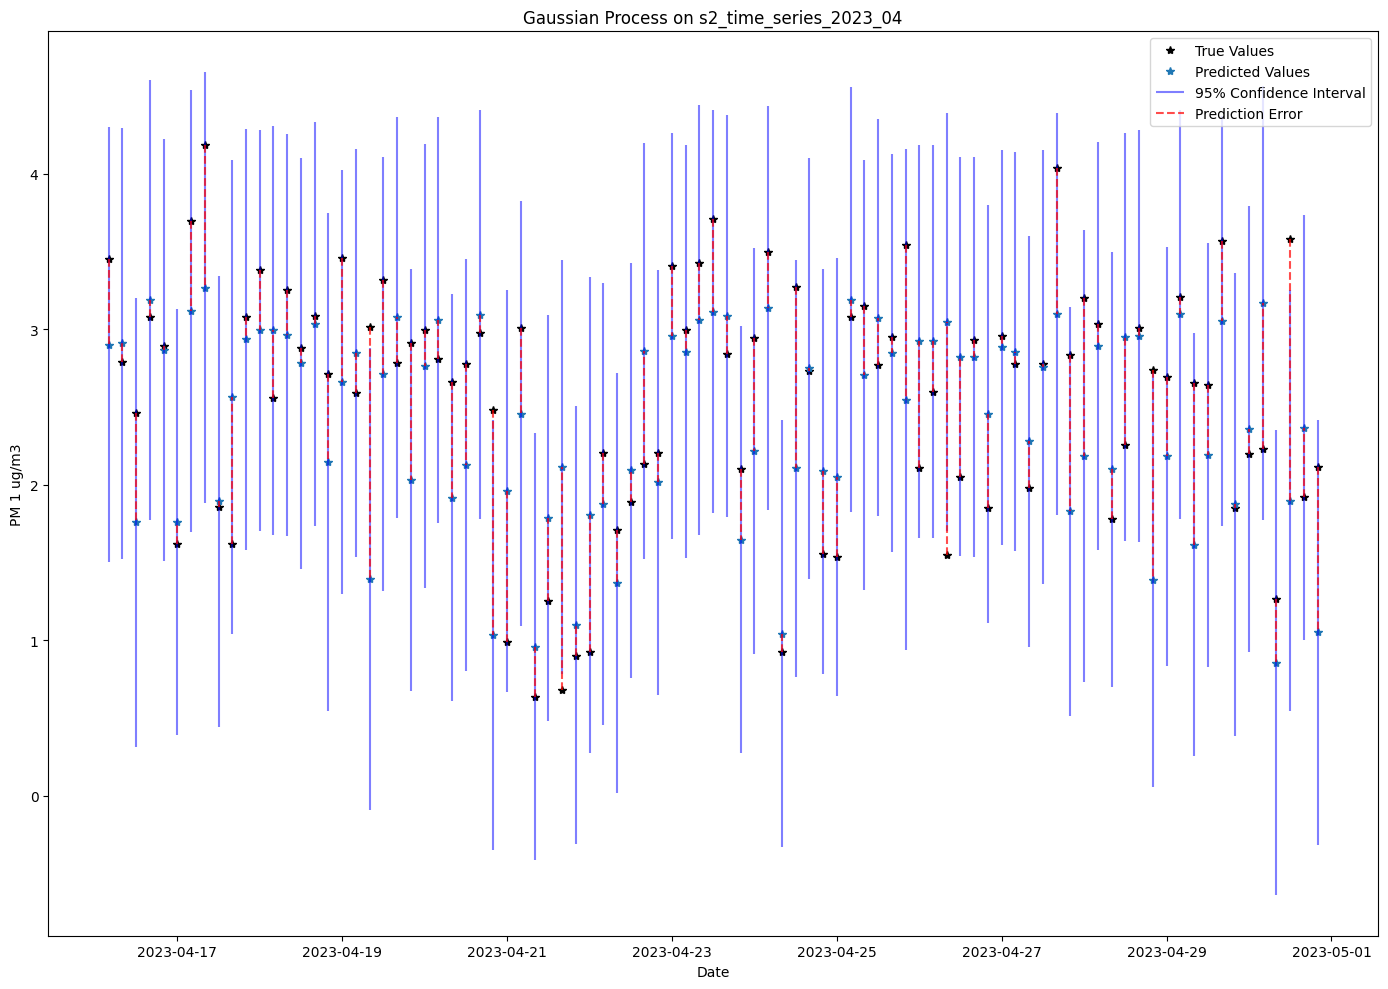

Iter 1/300 - Loss: 5.741 
Iter 11/300 - Loss: 5.071 
Iter 21/300 - Loss: 4.823 
Iter 31/300 - Loss: 4.692 
Iter 41/300 - Loss: 4.517 
Iter 51/300 - Loss: 4.243 
Iter 61/300 - Loss: 4.005 
Iter 71/300 - Loss: 3.806 
Iter 81/300 - Loss: 3.624 
Iter 91/300 - Loss: 3.466 
Iter 101/300 - Loss: 3.326 
Iter 111/300 - Loss: 3.198 
Iter 121/300 - Loss: 3.081 
Iter 131/300 - Loss: 2.972 
Iter 141/300 - Loss: 2.871 
Iter 151/300 - Loss: 2.775 
Iter 161/300 - Loss: 2.685 
Iter 171/300 - Loss: 2.600 
Iter 181/300 - Loss: 2.519 
Iter 191/300 - Loss: 2.443 
Iter 201/300 - Loss: 2.370 
Iter 211/300 - Loss: 2.301 
Iter 221/300 - Loss: 2.235 
Iter 231/300 - Loss: 2.172 
Iter 241/300 - Loss: 2.113 
Iter 251/300 - Loss: 2.056 
Iter 261/300 - Loss: 2.003 
Iter 271/300 - Loss: 1.952 
Iter 281/300 - Loss: 1.903 
Iter 291/300 - Loss: 1.857 
Mean Squared Error: 0.429
Negative Log Likelihood: 89.107
Mean Absolute Percentage Error: 33.815%


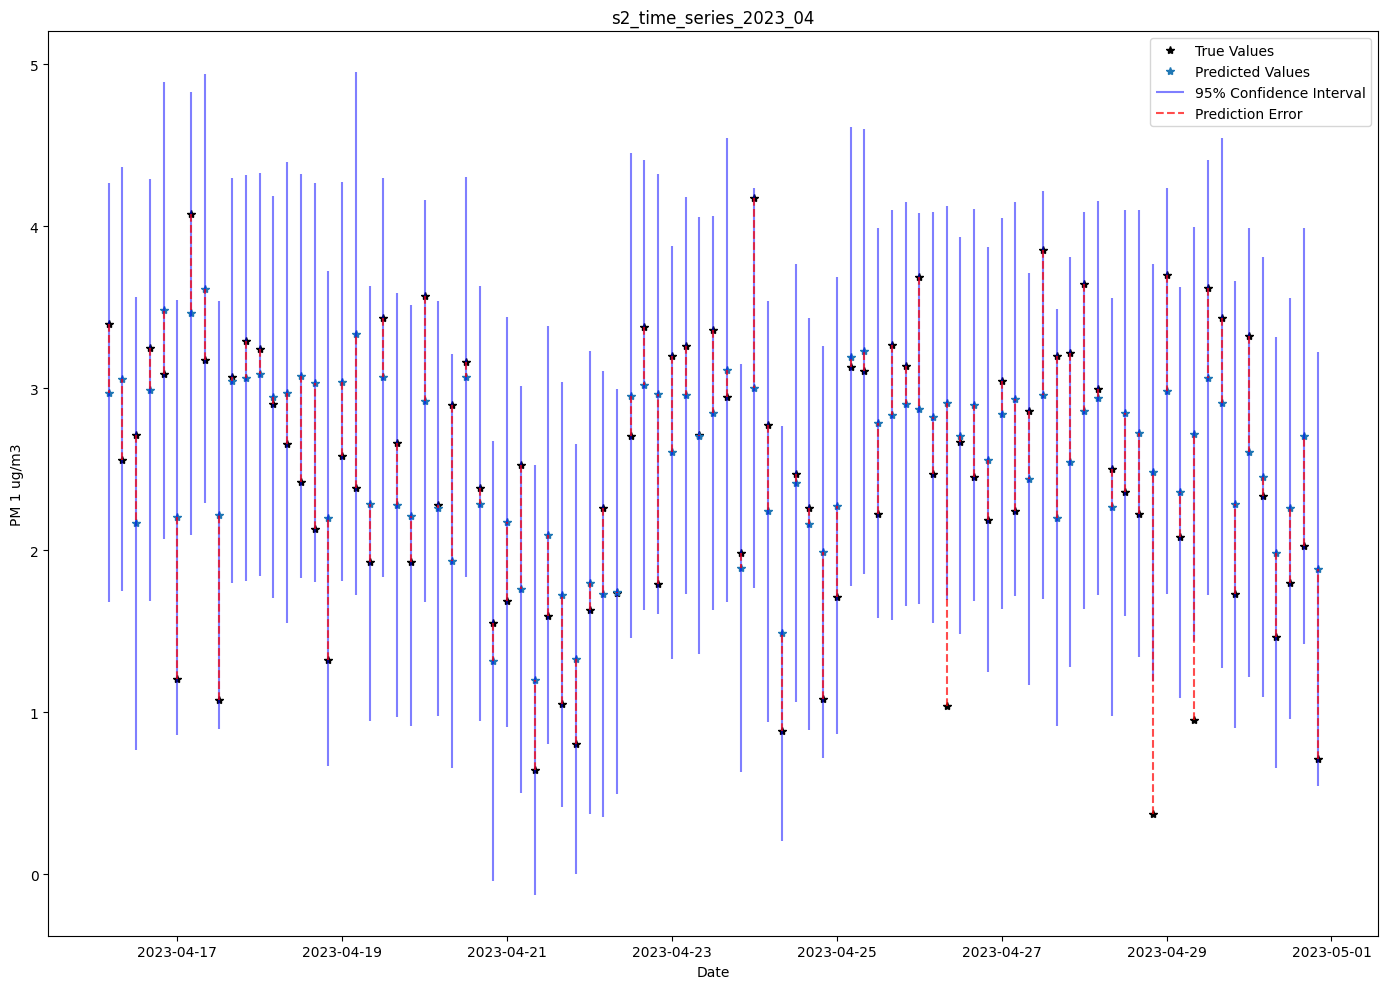

 
GP on s2 time series 2023 05 log_normalized data 50% test and train on both sets
Iter 1/300 - Loss: 5.063 
Iter 11/300 - Loss: 4.575 
Iter 21/300 - Loss: 4.303 
Iter 31/300 - Loss: 4.130 
Iter 41/300 - Loss: 3.981 
Iter 51/300 - Loss: 3.850 
Iter 61/300 - Loss: 3.725 
Iter 71/300 - Loss: 3.607 
Iter 81/300 - Loss: 3.495 
Iter 91/300 - Loss: 3.390 
Iter 101/300 - Loss: 3.289 
Iter 111/300 - Loss: 3.194 
Iter 121/300 - Loss: 3.102 
Iter 131/300 - Loss: 3.016 
Iter 141/300 - Loss: 2.932 
Iter 151/300 - Loss: 2.853 
Iter 161/300 - Loss: 2.777 
Iter 171/300 - Loss: 2.704 
Iter 181/300 - Loss: 2.634 
Iter 191/300 - Loss: 2.568 
Iter 201/300 - Loss: 2.504 
Iter 211/300 - Loss: 2.443 
Iter 221/300 - Loss: 2.384 
Iter 231/300 - Loss: 2.328 
Iter 241/300 - Loss: 2.275 
Iter 251/300 - Loss: 2.224 
Iter 261/300 - Loss: 2.175 
Iter 271/300 - Loss: 2.128 
Iter 281/300 - Loss: 2.084 
Iter 291/300 - Loss: 2.042 
Mean Squared Error: 0.804
Negative Log Likelihood: 119.295
Mean Absolute Percentage Erro

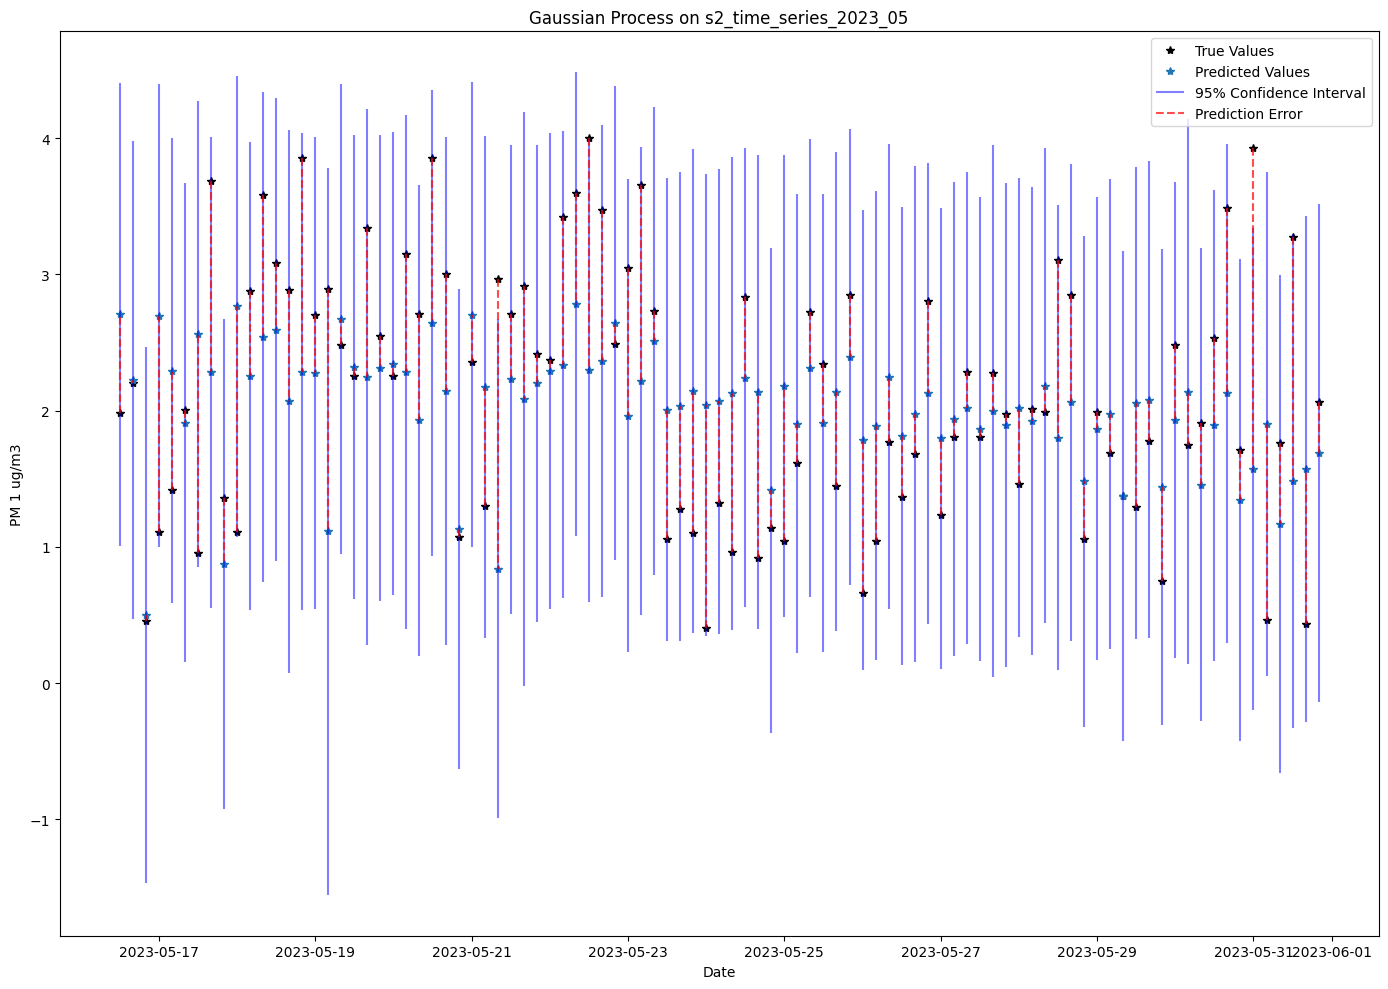

Iter 1/300 - Loss: 5.157 
Iter 11/300 - Loss: 4.652 
Iter 21/300 - Loss: 4.364 
Iter 31/300 - Loss: 4.194 
Iter 41/300 - Loss: 4.044 
Iter 51/300 - Loss: 3.902 
Iter 61/300 - Loss: 3.771 
Iter 71/300 - Loss: 3.646 
Iter 81/300 - Loss: 3.529 
Iter 91/300 - Loss: 3.419 
Iter 101/300 - Loss: 3.316 
Iter 111/300 - Loss: 3.217 
Iter 121/300 - Loss: 3.124 


KeyboardInterrupt: 

In [14]:
def log_normalize(data):
    epsilon = 1e-6
    data = np.maximum(data, 0)  # Ensure all values are non-negative
    return np.log1p(data + epsilon)

 # Define the month keys for s2 data
s2_keys = {
    's2_time_series_2022_06': s2_june22,
    's2_time_series_2022_07': s2_july22,
    's2_time_series_2022_08': s2_aug22,
    's2_time_series_2022_09': s2_sept22,
    's2_time_series_2022_10': s2_oct22,
    's2_time_series_2022_11': s2_nov22,
    's2_time_series_2022_12': s2_dec22,
    's2_time_series_2023_01': s2_jan23,
    's2_time_series_2023_02': s2_feb23,
    's2_time_series_2023_03': s2_mar23,
    's2_time_series_2023_04': s2_apr23,
    's2_time_series_2023_05': s2_may23,
    's2_time_series_2023_06': s2_june23,
}

# Loop through all months
for key, data in s2_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_s2_dict[key], f'Gaussian Process on {key}', 0)
    run_plt_gp(log_normalize(data), time_series_s2_dict[key],f'{key}', 1)
    print(" ")


In [ ]:
# Define the month keys for m1 data
m1_keys = {
    'm1_time_series_2022_06': m1_june22,
    'm1_time_series_2022_07': m1_july22,
    'm1_time_series_2022_08': m1_aug22,
    'm1_time_series_2022_09': m1_sept22,
    'm1_time_series_2022_10': m1_oct22,
    'm1_time_series_2022_11': m1_nov22,
    'm1_time_series_2022_12': m1_dec22,
    'm1_time_series_2023_01': m1_jan23,
    'm1_time_series_2023_02': m1_feb23,
    'm1_time_series_2023_03': m1_mar23,
    'm1_time_series_2023_04': m1_apr23,
    'm1_time_series_2023_05': m1_may23,
    'm1_time_series_2023_06': m1_june23,
}

# Loop through all months
for key, data in m1_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_m1_dict[key], f'Gaussian Process on {key}', 0)
    run_plt_gp(log_normalize(data), time_series_m1_dict[key],f'Gaussian Process on {key}', 1)
    print(" ")
